# Ciencia de Datos: Proyecto Final
---
Dorado Otero, Diego Isaac

Ferreyra, Santiago


In [ ]:
# Dirección GitHub
# https://github.com/diegodorado1729/Coding/tree/main/Python/CD-2024

# Introducción
---
**League of Legends**, también conocido como **LoL**, es un videojuego de estrategia en tiempo real (**RTS**) desarrollado por *Riot Games*. Lanzado en 2009, se ha convertido en uno de los juegos más populares y competitivos a nivel mundial. En el juego, dos equipos de cinco jugadores o *Invocadores* luchan en un combate jugador contra jugador, cada equipo ocupando y defendiendo su mitad del mapa ( a tambien llamado *Grieta del Invocador* ), con el objetivo de destruir la base del otro equipo.

El juego ha evolucionado a lo largo de los años por medio de actualizaciones,agregando nuevos personajes (*Campeones* ), modificaciones en el mapa y ajustes en las mecánicas de juego. Esto ha generado una enorme cantidad de datos que pueden ser analizados para comprender mejor el juego, las estrategias utilizadas por los jugadores y las tendencias en la comunidad de League of Legends.En los niveles mas altos de competencia (nivel profesional),un conocimiento profundo del juego ayuda y sus variables ayuda a tener un mayor entendimiento las condiciones necesaria para obtener la victoria.


# Motivación del trabajo

Los e-sports son cada día más y más conocidos. En especial el League of Legends (LoL) es uno de los precursores en el ámbito profesional de ellos, siendo uno de los que tiene mayor cobertura en su medio. Como ejemplo, el año pasado se jugó el campeonato insignia del League of Legends: **Los Worlds**. Algunas de sus [estadísticas](https://escharts.com/tournaments/lol/2023-world-championship) son:

- Máximo de visualizaciones: $6.402.760$
- Promedio de visualizaciones: $1.259.789$
- Horas vistas: $146.870.314hrs$

Estos datos no cuentan la audiencia China (que es la mayoría). Por supuesto, estos datos no supueran a los deportes tradicionales más vistos (Fútbol, NBA, NFL), pero cada año gana más relevancia, al punto que ya fue incluido en los [*Asian Games*](https://olympics.com/en/news/league-of-legends-esports-game-how-to-play-rules) (una especie de juegos olímpicos para los países asiáticos) y es posible que pronto sean incluidos en las mismas Olimpiadas.

Esta relevancia que va ganando el LoL, junto con nuestro gusto personal, nos llevó a interesarnos en estudiar los datos de partidas e intentar modelarlos con el fin de entender qué es lo que más influye a la hora de ganar una partida.

Para ello dispondremos de un [DataSet](https://www.kaggle.com/datasets/datasnaek/league-of-legends) que contiene algunos atributos que se relacionan con elementos del juego. Para entenderlo es necesario explicar un poco en qué consiste el Lol.

Una partida de League of Legends clásica se desarrolla en un enfrentamiento 5vs5 de jugadores que tienen que escojer un campeón cada uno. La partida tiene lugar en un *mapa* con la siguiente estructura:

![Mapa del LoL](https://upload.wikimedia.org/wikipedia/commons/thumb/d/dc/Map_of_MOBA.svg/800px-Map_of_MOBA.svg.png)

Como podemos observar, el *mapa* tiene tres *líneas*: **Top Lane**, **Middle Lane** y **Bot Lane**. Y en medio está la **jungla**. En cada línea va a un jugador, con excepción en la *bot lane* que van dos jugadores.

Los puntos azules y rojos en la lineas se llaman **torres**. En la base de cada equipo hay tres puntos también, estos son los **Inhibidores**, y por último, en el centro de la base hay un punto más grande, es el **Nexo**.

El objetivo del LoL es simple: Derribar el *nexo* del rival antes de que él tire el tuyo. Para ello hay muchos factores que pueden influenciar en ganar o perder. Un grupo grande de estos factores son los **atributos** del DataSet a estudiar.

Dentro de caracteristicas mas importantes se encuentran:

* **Campeones**: personajes que eligen los invocadores antes de que inicie la partida para jugar. Cada campeón tiene distintas habilidades y roles que serán determinantes en cada partida. Cada campeón estará determinado por los atributos `t1_champ1id`,`t1_champ2id`,...,`t2_champ1id`, `t2_champ2id`,...

* **Seleccion de Campeones**: previo al comienzo de partida, cada equipo elige sus campeones. Las distintas combinaciones de estos hace que se generar distintas *Composiciones*, cada una con su propio estilo de juego. En la selección de campeones, además de eleguir los 10 campeones a jugar, también se eligen 10 campeones que no se podrán jugar (campeones *baneados*). Sus atributos son: `t1_ban1`,`t2_ban1`,...,`t2_ban2`, `t2_ban2`,...

* **Estructuras**: dentro de los cuales se encuentran *Torretas*, *Inibidores*, *Nexos*. Son los objetivos mas "individuales" dentro del juego. Los atributos que les corresponden son: `firstTower`, `firstInhibitor`, `t1_towerKills`, `t1_inhibitorKills`,`t2_towerKills`, `t2_inhibitorKills`. Por supuesto, el *nexo* no tiene un atributo ya que si cae se gana la partida.

* **Objetivos Neutrales**: *Heraldo*, *Dragones*, *Barón*. Son los principales objetivos de equipo. Sus tributos son: `firstBaron`,`firstDragon`, `firstRiftHerald`, `t1_baronKills`, `t1_dragonKills`,`t1_riftHeraldKills`, `t2_baronKills`, `t2_dragonKills`,`t2_riftHeraldKills`.

* Existen otros factores determinantes en la partida, como *Items*, *Oro* y *Hechizos de invocador*, de los cuales en el DataSet solo tenemos como atributo a los *Hechizos de invocador* (*summuners*). Sus atributos son: `t1_champ1_sum1`, `t1_champ1_sum2`,...,`t2_champ1_sum1`, `t2_champ1_sum2`,....

* **Otros datos**: *Número de indentficación del juego* `gameId`, *Tiempo de creación de la partida* `creationTime`, *Duración del juego* `gameDuration`, *Temporada* `seasonId`, **Ganador** `winner`. Esta última será nuestra **clase**.


**Roles de los campeones:** Un factor determinante a la hora de crear un equipo balanceado en el LoL son los roles de cada campeón. Existen 6 roles:

1. **Mago**
2. **Soporte**
3. **Tirador**
4. **Luchador**
5. **Tanque**
6. **Asesino**

Cada uno de ellos en lo posible debería estar en una composición balanceada de equipo.

# Objetivo del trabajo
---

El objetivo principal de este proyecto es determinar qué variables dentro del LoL son las más influyentes a la hora de determinar cuál de los dos equipos gana la partida. Para ello entrenaremos diversos modelos de clasificación, los cuales arrojarán ciertas métricas que nos ayudarán a determinar esas variables. Evaluaremos por separado los atributos que intervienen antes de comenzar la partida, *pre-game*, en medio de ella, *in-game* y por último una evaluación general.


In [ ]:
# Autorizamos que collab acceda al drive
from google.colab import drive
drive.mount('/content/drive')

# General
import ast
import json
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import scipy.stats as stats

from time import time
from sklearn import metrics
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

# ensemble
from sklearn.ensemble import RandomForestClassifier

# metrics
from sklearn.metrics import (accuracy_score, recall_score, precision_score, f1_score)
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import RocCurveDisplay

# models
from sklearn.linear_model import Perceptron, LogisticRegressionCV
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# model_selection
from sklearn.model_selection import GridSearchCV, train_test_split, StratifiedShuffleSplit

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Reading the main data

#df = pd.read_csv('/content/drive/MyDrive/Lic. en Fisica/Machine Learning/Proyecto/games.csv')
#f = open('/content/drive/MyDrive/Lic. en Fisica/Machine Learning/Proyecto/champion_info_2.json')

df = pd.read_csv('/content/drive/MyDrive/Famaf/4to/CD/Proyecto/games.csv')
f =  open('/content/drive/MyDrive/Famaf/4to/CD/Proyecto/champion_info_2.json')

# Análisis de los Datos
----

In [ ]:
print("El tamaño del DataFrame es: \n")
print(f'Shape: {df.shape}')

df.head()

El tamaño del DataFrame es: 

Shape: (51490, 61)


,gameId,creationTime,gameDuration,seasonId,winner,firstBlood,firstTower,firstInhibitor,firstBaron,firstDragon,...,t2_towerKills,t2_inhibitorKills,t2_baronKills,t2_dragonKills,t2_riftHeraldKills,t2_ban1,t2_ban2,t2_ban3,t2_ban4,t2_ban5
0,3326086514,1504279457970,1949,9,1,2,1,1,1,1,...,5,0,0,1,1,114,67,43,16,51
1,3229566029,1497848803862,1851,9,1,1,1,1,0,1,...,2,0,0,0,0,11,67,238,51,420
2,3327363504,1504360103310,1493,9,1,2,1,1,1,2,...,2,0,0,1,0,157,238,121,57,28
3,3326856598,1504348503996,1758,9,1,1,1,1,1,1,...,0,0,0,0,0,164,18,141,40,51
4,3330080762,1504554410899,2094,9,1,2,1,1,1,1,...,3,0,0,1,0,86,11,201,122,18


Ahora veamos las columnas del DataFrame para analizar cuál es relevante o no para el análisis que vamos a realizar.

In [ ]:
df.columns

Index(['gameId', 'creationTime', 'gameDuration', 'seasonId', 'winner',
       'firstBlood', 'firstTower', 'firstInhibitor', 'firstBaron',
       'firstDragon', 'firstRiftHerald', 't1_champ1id', 't1_champ1_sum1',
       't1_champ1_sum2', 't1_champ2id', 't1_champ2_sum1', 't1_champ2_sum2',
       't1_champ3id', 't1_champ3_sum1', 't1_champ3_sum2', 't1_champ4id',
       't1_champ4_sum1', 't1_champ4_sum2', 't1_champ5id', 't1_champ5_sum1',
       't1_champ5_sum2', 't1_towerKills', 't1_inhibitorKills', 't1_baronKills',
       't1_dragonKills', 't1_riftHeraldKills', 't1_ban1', 't1_ban2', 't1_ban3',
       't1_ban4', 't1_ban5', 't2_champ1id', 't2_champ1_sum1', 't2_champ1_sum2',
       't2_champ2id', 't2_champ2_sum1', 't2_champ2_sum2', 't2_champ3id',
       't2_champ3_sum1', 't2_champ3_sum2', 't2_champ4id', 't2_champ4_sum1',
       't2_champ4_sum2', 't2_champ5id', 't2_champ5_sum1', 't2_champ5_sum2',
       't2_towerKills', 't2_inhibitorKills', 't2_baronKills', 't2_dragonKills',
       't2_riftHer

Las columnas `gameID`, `creationTime`, `seasonId` no aportan información relevante con respecto a quién ganó la partida. Por lo tanto decidimos eliminarlas.

Por otro lado, cada personaje elegido para la partida puede escoger 2 "hechizos de invocador" (*summoners* en inglés) los cuales aunque influyen en el modo del juego del campeón,son bastante estándar y la mayoría de jugadores está conciente de cuáles son los más adecuados para jugar. Así que los summoners no van a ser parámetros que influyan de manera significativa en el resultado de las partidas.
Por lo tanto, las columnas del estilo `t1_champ1_sum1` serán eliminadas.

Por último, los campeones baneados son otro factor que no influye en las partidas (su influencia es mayor en un ámbito competitivo). Así que las columnas del estilo `t1_ban1` serán eliminadas.


In [ ]:
df = df.drop(columns=['gameId','creationTime','seasonId',
                      't1_champ1_sum1','t1_champ1_sum2','t1_champ2_sum1','t1_champ2_sum2',
                      't1_champ3_sum1','t1_champ3_sum2','t1_champ4_sum1','t1_champ4_sum2',
                      't1_champ5_sum1','t1_champ5_sum2',
                      't2_champ1_sum1','t2_champ1_sum2','t2_champ2_sum1','t2_champ2_sum2',
                      't2_champ3_sum1','t2_champ3_sum2','t2_champ4_sum1','t2_champ4_sum2',
                      't2_champ5_sum1','t2_champ5_sum2',
                      't1_ban1', 't1_ban2', 't1_ban3', 't1_ban4','t1_ban5','t2_ban1',
                      't2_ban2', 't2_ban3', 't2_ban4', 't2_ban5'])

## **Transformacion en composiciones**



Los personajes del juego cuentan con 3 características:

1. El número de identificación representado por `id`
2. El nombre representado por `name`
3. El tipo de campeón representado por `tags`

En el DataFrame utilizado los personajes se encuentran identificados usando su número `id`. En este análisis nos queremos concentrar en las composiciones de los equipos y no tanto en los personajes de forma individual, así que los siguientes cuadros de código se centrarán en manipular el DataFrame original con el fin de cambiar los atributos de *campeones* a atributos de *composiciones*.

In [ ]:
#La información del id, name y tags vienen en un archivo .json

champs_2 = json.load(f)
rows = []
champs_df = pd.DataFrame(columns=['id', 'name'])
for _, champion_data in champs_2['data'].items():
    # El elemento id=-1 describe que características describe el
    # archivo json, asi que lo ignoramos.
    if float(champion_data['id']) < 0:
        continue
    champ_id = int(champion_data['id'])
    name = champion_data['name']
    role = champion_data['tags']
    rows.append({'id': champ_id, 'name': name, 'role': role})
champs_df['name'] = [row['name'] for row in rows]
champs_df['id'] = [row['id'] for row in rows]
champs_df['role'] = [row['role'] for row in rows]
f.close()
champs_df.sort_values('id',inplace=True)
champs_df

,id,name,role
57,1,Annie,[Mage]
52,2,Olaf,"[Fighter, Tank]"
89,3,Galio,"[Tank, Mage]"
73,4,Twisted Fate,[Mage]
112,5,Xin Zhao,"[Fighter, Assassin]"
...,...,...,...
37,429,Kalista,[Marksman]
68,432,Bard,"[Support, Mage]"
43,497,Rakan,[Support]
5,498,Xayah,[Marksman]


In [ ]:
# Notemos que no hay ningún valor nulo en los datos
df.isna().sum().unique()

array([0])

Acá vamos a juntar todos los *campeones* en un único atributo llamada `picks`

In [ ]:
# Seleccionar las columnas que contienen los identificadores de los campeones
columns_champs = [f"t{i}_champ{j}id" for i in range(1, 3) for j in range(1, 6)]

# Combina los valores de estas columnas en una lista para cada fila
df['picks'] = df[columns_champs].values.tolist()

# Elimina las columnas originales de los campeones si es necesario
df.drop(columns=columns_champs, inplace=True)

# Ahora, la columna 'picks' contiene una lista de los identificadores de campeones para cada partida


Los primeros $5$ *campeones* del atributo `picks` corresponden al primer equipo y los $5$ últimos al segundo equipo. ASí que dividimos estos $10$ *campeones* en 2 atributos: `comp_1` y `comp_2` que corresponden a la composición del equipo uno y dos respectivamente.

In [ ]:
df['comp_1'] = df['picks'].apply(lambda x: x[:5])
df['comp_2'] = df['picks'].apply(lambda x: x[5:])
df.drop(columns=['picks'], inplace=True)


df[['winner','comp_1','comp_2']]

,winner,comp_1,comp_2
0,1,"[8, 432, 96, 11, 112]","[104, 498, 122, 238, 412]"
1,1,"[119, 39, 76, 10, 35]","[54, 25, 120, 157, 92]"
2,1,"[18, 141, 267, 68, 38]","[69, 412, 126, 24, 22]"
3,1,"[57, 63, 29, 61, 36]","[90, 19, 412, 92, 22]"
4,1,"[19, 29, 40, 119, 134]","[37, 59, 141, 38, 51]"
...,...,...,...
51485,2,"[19, 429, 91, 432, 64]","[45, 83, 67, 40, 79]"
51486,2,"[90, 32, 31, 412, 18]","[102, 429, 89, 75, 45]"
51487,2,"[141, 18, 432, 81, 68]","[1, 119, 33, 43, 99]"
51488,2,"[121, 236, 420, 201, 99]","[21, 56, 25, 30, 11]"


[texto del vínculo](https://)Cada una de estas composiciones las deseamos tener en términos del role de cada *campeón* así que primero pasamos del `id` al `tag` del campeón.

In [ ]:
champion_info_2 = champs_2

# Crear un diccionario para mapear los IDs de los campeones a sus roles
id_to_tags = {}
for champ in champion_info_2['data'].values():
    id_to_tags[champ['id']] = champ['tags']

# Función para reemplazar los IDs de los campeones con sus roles
def replace_ids_with_tags(comp_list):
    return [id_to_tags.get(champ_id, ["Unknown"]) for champ_id in comp_list]

# Aplicar la función a las columnas de composiciones
df['comp_1'] = df['comp_1'].apply(replace_ids_with_tags)
df['comp_2'] = df['comp_2'].apply(replace_ids_with_tags)

#Codigo para que se puedan leer todas las composiciones sin que se trunquen
pd.set_option('display.max_colwidth', None)

# Mostrar el DataFrame resultante
df[['winner','comp_1','comp_2']]

,winner,comp_1,comp_2
0,1,"[[Mage, Tank], [Support, Mage], [Marksman, Mage], [Assassin, Fighter], [Mage]]","[[Marksman], [Marksman], [Fighter, Tank], [Assassin, Fighter], [Support, Fighter]]"
1,1,"[[Marksman], [Fighter, Assassin], [Assassin, Fighter], [Fighter, Support], [Assassin]]","[[Tank, Fighter], [Mage, Support], [Fighter, Tank], [Fighter, Assassin], [Fighter, Assassin]]"
2,1,"[[Marksman, Assassin], [Fighter, Assassin], [Support, Mage], [Fighter, Mage], [Assassin, Mage]]","[[Mage], [Support, Fighter], [Fighter, Marksman], [Fighter, Assassin], [Marksman, Support]]"
3,1,"[[Tank, Mage], [Mage], [Marksman, Assassin], [Mage, Support], [Fighter, Tank]]","[[Mage, Assassin], [Fighter, Tank], [Support, Fighter], [Fighter, Assassin], [Marksman, Support]]"
4,1,"[[Fighter, Tank], [Marksman, Assassin], [Support, Mage], [Marksman], [Mage, Support]]","[[Support, Mage], [Tank, Fighter], [Fighter, Assassin], [Assassin, Mage], [Marksman]]"
...,...,...,...
51485,2,"[[Fighter, Tank], [Marksman], [Assassin, Fighter], [Support, Mage], [Fighter, Assassin]]","[[Mage], [Fighter, Tank], [Marksman, Assassin], [Support, Mage], [Fighter, Mage]]"
51486,2,"[[Mage, Assassin], [Tank, Mage], [Tank, Mage], [Support, Fighter], [Marksman, Assassin]]","[[Fighter, Tank], [Marksman], [Tank, Support], [Fighter, Tank], [Mage]]"
51487,2,"[[Fighter, Assassin], [Marksman, Assassin], [Support, Mage], [Marksman, Mage], [Fighter, Mage]]","[[Mage], [Marksman], [Tank, Fighter], [Mage, Support], [Mage, Support]]"
51488,2,"[[Assassin, Fighter], [Marksman], [Fighter, Tank], [Support, Tank], [Mage, Support]]","[[Marksman], [Assassin, Fighter], [Mage, Support], [Mage], [Assassin, Fighter]]"


Por supuesto, muchos de los *campeones* no están limitados a un único rol, por el contrario, pueden tener dos o incluso tres roles. Por lo tanto, evidentemente habrán roles repetidos (basta con ver la tabla anterior para comprobarlo). Es necesario entonces sólo conservar los roles sin repetirlos.

In [ ]:
def remove_duplicates_and_flatten(comp):
    flattened = [role for sublist in comp for role in sublist]
    return list(set(flattened))

# Aplicar la función a las columnas de composiciones
df['comp_1_unique'] = df['comp_1'].apply(remove_duplicates_and_flatten)
df['comp_2_unique'] = df['comp_2'].apply(remove_duplicates_and_flatten)

df.drop(columns=['comp_1', 'comp_2'], inplace=True)

df.rename(columns={'comp_1_unique': 'comp_1', 'comp_2_unique': 'comp_2'}, inplace=True)

# Definir el orden de las etiquetas
label_order = ['Fighter', 'Assassin', 'Mage', 'Marksman', 'Tank', 'Support']

# Función para asignar un valor numérico a cada etiqueta basado en su posición en el orden
def label_order_key(label):
    return label_order.index(label)

# Aplicar la función de orden personalizada a cada lista de composiciones en las columnas comp_1 y comp_2
df['comp_1'] = df['comp_1'].apply(lambda composition: sorted(composition, key=label_order_key))
df['comp_2'] = df['comp_2'].apply(lambda composition: sorted(composition, key=label_order_key))

In [ ]:
df[['winner','comp_1','comp_2']]

,winner,comp_1,comp_2
0,1,"[Fighter, Assassin, Mage, Marksman, Tank, Support]","[Fighter, Assassin, Marksman, Tank, Support]"
1,1,"[Fighter, Assassin, Marksman, Support]","[Fighter, Assassin, Mage, Tank, Support]"
2,1,"[Fighter, Assassin, Mage, Marksman, Support]","[Fighter, Assassin, Mage, Marksman, Support]"
3,1,"[Fighter, Assassin, Mage, Marksman, Tank, Support]","[Fighter, Assassin, Mage, Marksman, Tank, Support]"
4,1,"[Fighter, Assassin, Mage, Marksman, Tank, Support]","[Fighter, Assassin, Mage, Marksman, Tank, Support]"
...,...,...,...
51485,2,"[Fighter, Assassin, Mage, Marksman, Tank, Support]","[Fighter, Assassin, Mage, Marksman, Tank, Support]"
51486,2,"[Fighter, Assassin, Mage, Marksman, Tank, Support]","[Fighter, Mage, Marksman, Tank, Support]"
51487,2,"[Fighter, Assassin, Mage, Marksman, Support]","[Fighter, Mage, Marksman, Tank, Support]"
51488,2,"[Fighter, Assassin, Mage, Marksman, Tank, Support]","[Fighter, Assassin, Mage, Marksman, Support]"


Con el fin de analizar las composiciones, lo primero es contar cuántas composiciones únicas hay y la veces que fue jugada esa composición. Además podemos calcular el porcentaje de veces que se usó alguna composición vs al total de partidas. Lo cuál nos indicará qué composiciones son más populares a la hora de formar tu equipo.

In [ ]:
# Combinar las composiciones de ambos equipos
all_compositions = df['comp_1'].tolist() + df['comp_2'].tolist()

# Ordenar las composiciones originales
all_compositions = [sorted(comp, key=label_order_key) for comp in all_compositions]

# Convertir las listas en tuplas para eliminar duplicados independientemente del orden
all_compositions = [tuple(comp) for comp in all_compositions]

# Eliminar las composiciones duplicadas
unique_compositions = set(all_compositions)

# Ordenar las composiciones únicas
sorted_unique_compositions = sorted(unique_compositions)

# Calcular la cantidad de composiciones únicas
unique_compositions_count = len(sorted_unique_compositions)

# Crear un diccionario para contar las ocurrencias de cada composición
composition_counts = {}
for comp in all_compositions:
    composition_counts[comp] = composition_counts.get(comp, 0) + 1

# Ordenar las composiciones por cantidad de ocurrencias
sorted_compositions = sorted(composition_counts.items(), key=lambda x: x[1], reverse=True)

# Crear DataFrame con la información
results_df = pd.DataFrame(sorted_compositions, columns=['Composición', 'Ocurrencias'])
results_df['Porcentaje'] = (results_df['Ocurrencias'] / len(df)) * 100

# Mostrar la cantidad de composiciones únicas
print("Cantidad de composiciones únicas:", unique_compositions_count)
print()

# Mostrar el DataFrame con el índice ajustado
results_df

Cantidad de composiciones únicas: 38



,Composición,Ocurrencias,Porcentaje
0,"(Fighter, Assassin, Mage, Marksman, Tank, Support)",50913,98.879394
1,"(Fighter, Assassin, Mage, Marksman, Support)",19181,37.251894
2,"(Fighter, Mage, Marksman, Tank, Support)",10692,20.765197
3,"(Fighter, Assassin, Mage, Marksman, Tank)",8759,17.011070
4,"(Fighter, Assassin, Marksman, Tank, Support)",4669,9.067780
5,"(Fighter, Assassin, Marksman, Tank)",1832,3.557972
6,"(Fighter, Assassin, Mage, Marksman)",1181,2.293649
7,"(Fighter, Assassin, Marksman, Support)",1063,2.064479
8,"(Fighter, Mage, Marksman, Tank)",1005,1.951835
9,"(Assassin, Mage, Marksman, Tank, Support)",880,1.709070


In [ ]:
# Crear un diccionario para mapear las composiciones a números
composition_to_number = {comp: i for i, comp in enumerate(sorted_unique_compositions, start=1)}

composition_to_number

{('Assassin', 'Mage', 'Marksman'): 1,
 ('Assassin', 'Mage', 'Marksman', 'Support'): 2,
 ('Assassin', 'Mage', 'Marksman', 'Tank'): 3,
 ('Assassin', 'Mage', 'Marksman', 'Tank', 'Support'): 4,
 ('Assassin', 'Mage', 'Support'): 5,
 ('Assassin', 'Marksman', 'Support'): 6,
 ('Assassin', 'Marksman', 'Tank', 'Support'): 7,
 ('Fighter', 'Assassin', 'Mage'): 8,
 ('Fighter', 'Assassin', 'Mage', 'Marksman'): 9,
 ('Fighter', 'Assassin', 'Mage', 'Marksman', 'Support'): 10,
 ('Fighter', 'Assassin', 'Mage', 'Marksman', 'Tank'): 11,
 ('Fighter', 'Assassin', 'Mage', 'Marksman', 'Tank', 'Support'): 12,
 ('Fighter', 'Assassin', 'Mage', 'Support'): 13,
 ('Fighter', 'Assassin', 'Mage', 'Tank'): 14,
 ('Fighter', 'Assassin', 'Mage', 'Tank', 'Support'): 15,
 ('Fighter', 'Assassin', 'Marksman'): 16,
 ('Fighter', 'Assassin', 'Marksman', 'Support'): 17,
 ('Fighter', 'Assassin', 'Marksman', 'Tank'): 18,
 ('Fighter', 'Assassin', 'Marksman', 'Tank', 'Support'): 19,
 ('Fighter', 'Assassin', 'Support'): 20,
 ('Fighter

In [ ]:
# Reemplazar las composiciones en comp_1 y comp_2 por sus respectivos números
df['comp_1'] = df['comp_1'].apply(lambda x: composition_to_number[tuple(sorted(x, key=label_order_key))])
df['comp_2'] = df['comp_2'].apply(lambda x: composition_to_number[tuple(sorted(x, key=label_order_key))])

# Mostrar el DataFrame actualizado
df[['winner','comp_1','comp_2']]

,winner,comp_1,comp_2
0,1,12,19
1,1,17,15
2,1,10,10
3,1,12,12
4,1,12,12
...,...,...,...
51485,2,12,12
51486,2,12,26
51487,2,10,26
51488,2,12,10


## Tiempo de Partidas

Podemos ver una gran cantidad de partidas que acabaron antes del minuto 15. Esto se debe al sistema "Renovar" que tiene el LoL cuando un jugador abandona la partida incluso antes de entrar (se denomina "AFK", Away From Keyboard). Estas partidas no cuenta ni como victoria ni como derrota para ninguno de los jugadores, así que lo mejor es sacarlas de nuestro análisis.

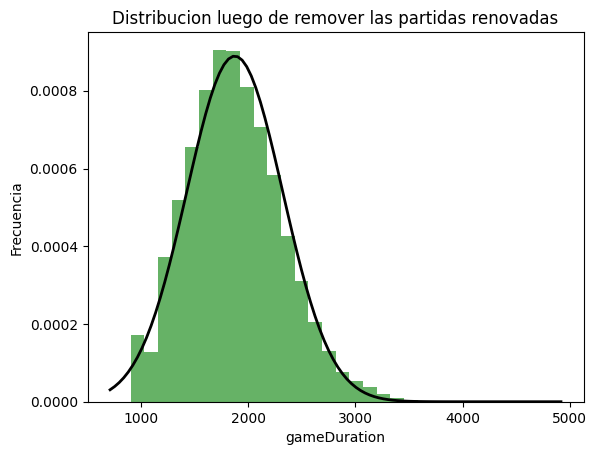

In [ ]:
df1 = df[df['gameDuration']>=900]
data = df1['gameDuration']

# Ajustar una distribución a los datos
dist = stats.norm
params = dist.fit(data)

# Histograma de los datos
plt.hist(data, bins=30, density=True, alpha=0.6, color='g')

# Crear una línea para la distribución ajustada
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = dist.pdf(x, *params)
plt.plot(x, p, 'k', linewidth=2)
plt.title('Distribucion luego de remover las partidas renovadas')
plt.xlabel('gameDuration')
plt.ylabel('Frecuencia')

# Mostrar el gráfico
plt.show()

## Reduccion de Dataset

Dada la gran cantidad de datos, y que estos son recolectados al momento de finalizar la partida, se decidio hacer una reduccion del dataset para asi poder realizar el ajuse teniendo en cuenta solo estadios mas tempranos de la partida, donde la partida no esta tan definida en terminos de ventaja para uno u otro equipo. Con este criterio se decidio limitar la duracion de partida y la cantidad de inhibidores derribados (aplicando ambas condiciones simultaneamente).

En cuanto a la duracion de partida, se tomaron partidas de entre 15 y 20 minutos, dado que a minuto 20 se da la segunda oportunidad de rendirse en la partida (momento en el cual cualquiera de los dos equipos decide si quiere continuar o no la partida por medio de votacion de sus miembros). Ademas, este valor esta por debajo del promedio de duracion de una partida, por lo cual, nos da la capacidad de predecir gran cantidad de las partidas.

Por otro lado, respecto a la cantida de inhibidores derribados, se decidio limitar las partidas hasta el momento en que alguno de los dos equipos logra derribar UN inhibidor enemigo. Esto se debe a que al derribar un inhibidor, el equipo que lo hace obtiene acceso a la base enemiga ademas de una mejora que le permite presionar con mayor fuerza, marcando una tendencia bastante determinante en el resultado de la partida.




In [ ]:
# Limitacion de Duracion de Partida
inf_time = df['gameDuration']>=900 # 15 minutos
sup_time = df["gameDuration"]<=1200 # 20 minutos
df_time_lim = df[inf_time & sup_time]
df_time_lim.shape # (2333, 20)

# Limitacion de inhibidores derribados
t1_inhib = df_time_lim['t1_inhibitorKills'] < 2
t2_inhib = df_time_lim['t2_inhibitorKills'] < 2
df_inhib_lim = df_time_lim[t1_inhib & t2_inhib]
df_inhib_lim.shape # (1865, 20)

# Dataset a utilizar
df_clean = df_inhib_lim.copy()
df_clean.shape # (1865, 20)

# Primer inhibidor tirado
df_firstInhib = df[(df.t1_inhibitorKills < 2) & (df.t2_inhibitorKills < 2)]
df_firstInhib.gameDuration.mean() # 1611 -> +25 minutos

df_clean.shape # (20750, 20)

(1865, 20)

Al limitar el dataset de acuerdo a los criterios antes mencionados se logró reducir a uno nuevo con 1865 instancias.

Ahora vamos a dividir nuestro data frame en dos partes:

- La primera parte tendrá la información previa a empezar la partida, solo contiene la composición de los equipos

- La segunda parte contiene informacion obtenida sobre el transcurso de la partida, como *Estructuras* y *Objetivos Neutrales*, mencionando ademas quien consiguio el primero de cada categoria.

Con esta dision se crean tres dataset: **df_pre**, **df_in**, **df_all**, siendo el ultimo una concatenacion de los dos explicados anteriormente.

In [ ]:
df1=df_clean.drop(columns=['gameDuration'])

# Definir las columnas para cada DataFrame
columnas_pregame = ['winner', 'comp_1', 'comp_2']

columnas_ingame = ['winner', 'firstBlood', 'firstTower', 'firstInhibitor', 'firstBaron', 'firstDragon',
                   'firstRiftHerald', 't1_towerKills', 't1_inhibitorKills', 't1_baronKills', 't1_dragonKills',
                   't1_riftHeraldKills', 't2_towerKills', 't2_inhibitorKills', 't2_baronKills', 't2_dragonKills',
                   't2_riftHeraldKills']

# Crear los DataFrames
df_pre = df1[columnas_pregame].copy()
df_in = df1[columnas_ingame].copy()
df_all = df1.copy()  # df_all es una copia del DataFrame original, pero ya filtrado y sin columnas innecesarias

Con el objetivo de reducir los datos aun mas, se crean otro dataset denotado **df_diff** con la diferencia de objetivos logrados por ambos equipo, reduciendo asi la cantidad de *features* en relacion a los de **df_in**.

In [ ]:
# Diferencia
diff = df1
diff["towerKills"] = df1['t1_towerKills'] - df1['t2_towerKills']
diff["inhibitorKills"] = df1['t1_inhibitorKills'] - df1['t2_inhibitorKills']
diff["baronKills"] = df1['t1_baronKills'] - df1['t2_baronKills']
diff["dragonKills"] = df1['t1_dragonKills'] - df1['t2_dragonKills']
diff["riftHeraldKills"] = df1['t1_riftHeraldKills'] - df1['t2_riftHeraldKills']

columnas_diff = ['winner', 'firstBlood', 'firstTower', 'firstInhibitor', 'firstBaron', 'firstDragon',
                 'firstRiftHerald', "towerKills", "inhibitorKills", "baronKills", "dragonKills",
                 "riftHeraldKills"]

df_diff = diff[columnas_diff].copy()
df_diff.shape

(1865, 12)

In [ ]:
# Suponiendo que tus DataFrames ya están preparados: df_pre, df_in, df_all

# Función para dividir un DataFrame en conjuntos de entrenamiento y prueba
def dividir_dataset(df, target):
    X = df.drop(columns=[target])
    y = df[target]
    return train_test_split(X, y, test_size=0.2, random_state=42)

# Dividir los datasets
X_train_pre, X_test_pre, y_train_pre, y_test_pre = dividir_dataset(df_pre, 'winner')
X_train_in, X_test_in, y_train_in, y_test_in = dividir_dataset(df_in, 'winner')
X_train_all, X_test_all, y_train_all, y_test_all = dividir_dataset(df_all, 'winner')
X_train_diff, X_test_diff, y_train_diff, y_test_diff = dividir_dataset(df_diff, 'winner')

Ya realizada la division de los *dataset* en sus correspondientes conjuntos de entrenamiento y testeo se procede con la implementacion de los distintos clasificadores

# Clasificadores
---

Para los procesos de clasificación se utilizaran varios modelos propios de la libreria de [*SciKit Learn*](https://scikit-learn.org/stable/supervised_learning.html), con el objetivo de evaluar el rendimiento de cada uno de los clasificadores seleccionados e intentando optimizarlos en caso que sea posible.

## Navie Bayes

A pesar de la aparente simplificacion del modelo de **Naive Bayes**, dado que asume independencia entre los *features*, es un clasificador que funciona bastante bien en muchas situaciones. Este se destaca por ser extremadamente rapido en comparacion con otros modelos mas sofisticados, es por esto que se decidio utilizarlo como baseline de comparación.



### Pre-game

Naive Bayes - Pre-game:
              precision    recall  f1-score   support

           1       0.51      0.98      0.67       191
           2       0.56      0.03      0.05       182

    accuracy                           0.51       373
   macro avg       0.53      0.50      0.36       373
weighted avg       0.53      0.51      0.37       373



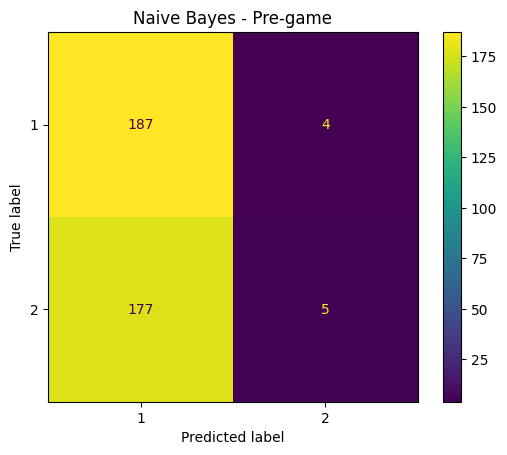

In [ ]:
# Naive Bayes para el dataset Pre-game
nb_pre = GaussianNB()
nb_pre.fit(X_train_pre, y_train_pre)
y_pred_pre = nb_pre.predict(X_test_pre)

print("Naive Bayes - Pre-game:")
print(classification_report(y_test_pre, y_pred_pre))

cm_pre = confusion_matrix(y_test_pre, y_pred_pre)
disp_pre = ConfusionMatrixDisplay(confusion_matrix=cm_pre, display_labels=[1,2])
disp_pre.plot()
plt.title("Naive Bayes - Pre-game")
plt.show()

Podemos notar que tenemos una *accuracy* de 0.51. Esto puede corresponder a que el juego esta diseñado para que cada equipo tenga las mismas posibilidades de ganar la partida en un primer momento. Sin embargo, todavía no podemos sacar ninguna conclusión, hay que probar en otros clasificadores para estar seguros.

### In-game

Naive Bayes - In-game:
              precision    recall  f1-score   support

           1       0.94      0.99      0.96       191
           2       0.99      0.93      0.96       182

    accuracy                           0.96       373
   macro avg       0.97      0.96      0.96       373
weighted avg       0.96      0.96      0.96       373



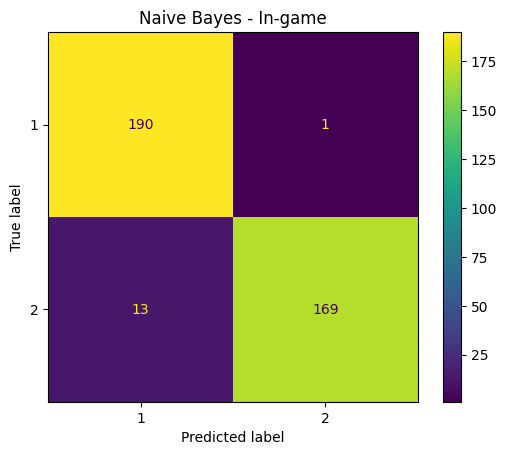

In [ ]:
# Naive Bayes para el dataset In-game
nb_in = GaussianNB()
nb_in.fit(X_train_in, y_train_in)
y_pred_in = nb_in.predict(X_test_in)

print("Naive Bayes - In-game:")
print(classification_report(y_test_in, y_pred_in))

cm_in = confusion_matrix(y_test_in, y_pred_in)
disp_in = ConfusionMatrixDisplay(confusion_matrix=cm_in, display_labels=[1,2])
disp_in.plot()
plt.title("Naive Bayes - In-game")
plt.show()

Naive Bayes - In-game (df_diff):
              precision    recall  f1-score   support

           1       0.94      0.98      0.96       191
           2       0.98      0.93      0.96       182

    accuracy                           0.96       373
   macro avg       0.96      0.96      0.96       373
weighted avg       0.96      0.96      0.96       373



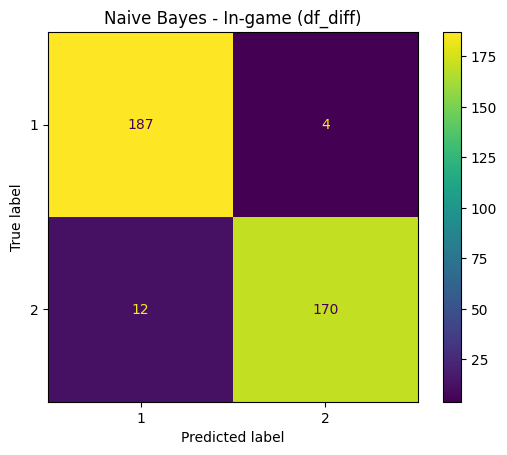

In [ ]:
# Naive Bayes para el dataset In-game (df_diff)
nb_diff = GaussianNB()
nb_diff.fit(X_train_diff, y_train_diff)
y_pred_diff = nb_diff.predict(X_test_diff)

print("Naive Bayes - In-game (df_diff):")
print(classification_report(y_test_diff, y_pred_diff))

cm_diff = confusion_matrix(y_test_diff, y_pred_diff)
disp_diff = ConfusionMatrixDisplay(confusion_matrix=cm_diff, display_labels=[1,2])
disp_diff.plot()
plt.title("Naive Bayes - In-game (df_diff)")
plt.show()


Notamos que ambos *dataframes* con datos recolectados durante la partida, a pesar de tener un tratamiento distinto de sus valores, obtienen el mismo *accuracy* de 0.96. Por esta razon, y como se explico al momento de seleccionar los *features* de cada *dataframe*, se decidio usar solo **df_diff** para la clasificacion In-game.

### All

Naive Bayes - All:
              precision    recall  f1-score   support

           1       0.94      0.99      0.97       191
           2       0.99      0.93      0.96       182

    accuracy                           0.97       373
   macro avg       0.97      0.96      0.97       373
weighted avg       0.97      0.97      0.97       373



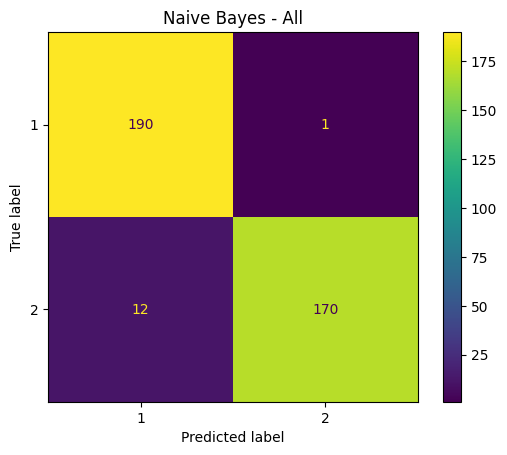

In [ ]:
# Naive Bayes para el dataset All
nb_all = GaussianNB()
nb_all.fit(X_train_all, y_train_all)
y_pred_all = nb_all.predict(X_test_all)

print("Naive Bayes - All:")
print(classification_report(y_test_all, y_pred_all))

cm_all = confusion_matrix(y_test_all, y_pred_all)
disp_all = ConfusionMatrixDisplay(confusion_matrix=cm_all, display_labels=[1,2])
disp_all.plot()
plt.title("Naive Bayes - All")
plt.show()


Ahora analicemos qué atributos tienen mayor peso a la hora de clasificar, para ello eliminaremos una columna, aplicaremos el modelo y calcularemos sus metricas. Esto lo haremos con cada atributo.

In [ ]:
#Usamos el clasificador de Navie Bayes

model = GaussianNB()

#Hacemos una funcion que calcule todas las metricas que necesitamos
def train(X_train, X_test, y_train, y_test):

  model.fit(X_train, y_train);
  y_pred = model.predict(X_test)

  accuray = accuracy_score(y_test, y_pred)
  rcall =  recall_score(y_test, y_pred, pos_label=1)
  pr = precision_score(y_test, y_pred, pos_label=1)
  f1 = f1_score(y_test, y_pred, average="weighted")

  return [accuray, rcall, pr, f1, y_pred]

In [ ]:
# creamos el nuevo DataFrame
df2 = pd.DataFrame({'col. eliminated': [], 'accuracy': [], 'recall': [], 'precision': [], 'f1-score': []})

i=-1

# Definir los grupos de columnas a eliminar juntos
groups = {
    'towerKills': ['t1_towerKills', 't2_towerKills'],
    'inhibitorKills': ['t1_inhibitorKills', 't2_inhibitorKills'],
    'baronKills': ['t1_baronKills', 't2_baronKills'],
    'dragonKills': ['t1_dragonKills', 't2_dragonKills'],
    'riftHeraldKills': ['t1_riftHeraldKills', 't2_riftHeraldKills']
}

individual_columns = [
    'firstBlood', 'firstTower', 'firstInhibitor', 'firstBaron', 'firstDragon', 'firstRiftHerald',
    'comp_1', 'comp_2'
]

#Le vamos agragando filas al DataFrame creado anteriormente
#Cada fila agrega los metricas pedidas quitando cada columna
# Agregar filas al DataFrame creado anteriormente
while i < len(individual_columns) + len(groups):
    if i == -1:
        m = train(X_train_all, X_test_all, y_train_all, y_test_all)
        df_aux = pd.DataFrame({'col. eliminated': ['none'], 'accuracy': [m[0]], 'recall': [m[1]], 'precision': [m[2]], 'f1-score': [m[3]]})
        df2 = pd.concat([df2, df_aux], ignore_index=True)
    else:
        if i < len(individual_columns):
            col = individual_columns[i]
            X_train_modified = X_train_all.drop(columns=[col])
            X_test_modified = X_test_all.drop(columns=[col])
            m = train(X_train_modified, X_test_modified, y_train_all, y_test_all)
            df_aux = pd.DataFrame({'col. eliminated': [col], 'accuracy': [m[0]], 'recall': [m[1]], 'precision': [m[2]], 'f1-score': [m[3]]})
            df2 = pd.concat([df2, df_aux], ignore_index=True)
        else:
            group_idx = i - len(individual_columns)
            group_name = list(groups.keys())[group_idx]
            cols_to_drop = groups[group_name]
            X_train_modified = X_train_all.drop(columns=cols_to_drop)
            X_test_modified = X_test_all.drop(columns=cols_to_drop)
            m = train(X_train_modified, X_test_modified, y_train_all, y_test_all)
            df_aux = pd.DataFrame({'col. eliminated': [group_name], 'accuracy': [m[0]], 'recall': [m[1]], 'precision': [m[2]], 'f1-score': [m[3]]})
            df2 = pd.concat([df2, df_aux], ignore_index=True)
    i += 1

df2

,col. eliminated,accuracy,recall,precision,f1-score
0,none,0.965147,0.994764,0.940594,0.965092
1,firstBlood,0.962466,0.989529,0.940299,0.962415
2,firstTower,0.949062,0.984293,0.921569,0.948957
3,firstInhibitor,0.965147,0.994764,0.940594,0.965092
4,firstBaron,0.965147,0.994764,0.940594,0.965092
5,firstDragon,0.967828,0.994764,0.945274,0.967784
6,firstRiftHerald,0.967828,1.000000,0.940887,0.967770
7,comp_1,0.965147,0.994764,0.940594,0.965092
8,comp_2,0.965147,0.994764,0.940594,0.965092
9,towerKills,0.927614,0.979058,0.890476,0.927336


Teniendo en cuenta que el *accuracy* general es $0.97$, entonces podemos quitar algunos atributos que no cambien mucho el *accuracy*. Como podemos ver en la tabla, los atributos `firstBlood`, `firstInhibitor`, `firstBaron`, `firstDragon`, `firstRiftHerald`, `riftHeraldKills`. Sin estos atributos, entrenemos de nuevo el modelo para ver si la *accuracy* empeora, se mantiene igual o mejora.

In [ ]:
df_all_op=df_all.drop(columns=['firstBlood', 'firstInhibitor', 'firstBaron',
                 'firstDragon', 'firstRiftHerald', 't1_riftHeraldKills', 't2_riftHeraldKills',
                 't1_riftHeraldKills', 't2_riftHeraldKills'])


In [ ]:
X_train_all, X_test_all, y_train_all, y_test_all = dividir_dataset(df_all_op, 'winner')

Naive Bayes - All:
              precision    recall  f1-score   support

           1       0.95      1.00      0.97       191
           2       1.00      0.95      0.97       182

    accuracy                           0.97       373
   macro avg       0.98      0.97      0.97       373
weighted avg       0.97      0.97      0.97       373



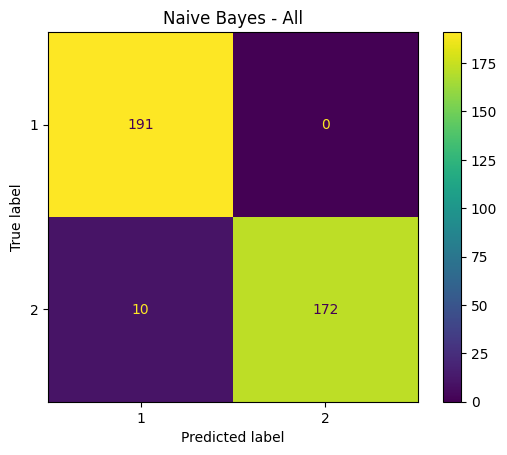

In [ ]:
# Naive Bayes para el dataset All
nb_all = GaussianNB()
nb_all.fit(X_train_all, y_train_all)
y_pred_all = nb_all.predict(X_test_all)

print("Naive Bayes - All:")
print(classification_report(y_test_all, y_pred_all))

cm_all = confusion_matrix(y_test_all, y_pred_all)
disp_all = ConfusionMatrixDisplay(confusion_matrix=cm_all, display_labels=[1,2])
disp_all.plot()
plt.title("Naive Bayes - All")
plt.show()

Podemos notar que la métrica *accuracy* se mantuvo en $0,97$ al quitarle los parámetros que no influían significativamente en ella, por lo tanto el modelo es mejor.

Esto nos indica que los atributos que descartamos no impactan significativamente en las partidas. Sin embargo hay que tener en cuenta que la mayoría de los atributos que obviamos son objetivos neutrales del juego. Estos objetivos influyen much más cuando nos emcontramos es un ámbito profesional, pero los datos que tenemos son de jugadores que no son profesionales, por lo tanto tiene mayor importancia la performance y objetivos individuales que los objetivos grupales.

## Perceptron

El modelo de Perceptron, es un modelo lineal, es decir que el valor esperado es una combinacion lineal de las caracteristicas. Al igual que Naive Bayes, es un algoritmo simple de clasificacion adecuado para aprendizaje en gran escala.

### Pre-game

Perceptron - Pre-game:
              precision    recall  f1-score   support

           1       0.51      0.99      0.68       191
           2       0.50      0.01      0.01       182

    accuracy                           0.51       373
   macro avg       0.51      0.50      0.34       373
weighted avg       0.51      0.51      0.35       373



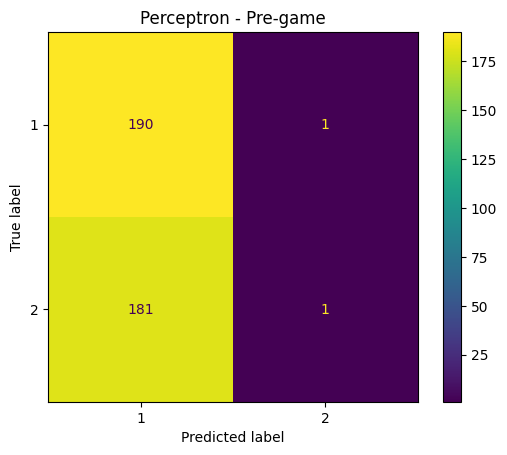

In [ ]:
from sklearn.linear_model import Perceptron

# Perceptron para el dataset Pre-game
perceptron_pre = Perceptron(max_iter=1000, alpha=0.01)
perceptron_pre.fit(X_train_pre, y_train_pre)
y_pred_pre = perceptron_pre.predict(X_test_pre)

print("Perceptron - Pre-game:")
print(classification_report(y_test_pre, y_pred_pre))

cm_pre = confusion_matrix(y_test_pre, y_pred_pre)
disp_pre = ConfusionMatrixDisplay(confusion_matrix=cm_pre, display_labels=[1,2])
disp_pre.plot()
plt.title("Perceptron - Pre-game")
plt.show()


Al igual que para el modelo de Naive Bayes, este obtiene un *accuracy* de 0.51. Ya notanto un patron, ahora si podemos concluir que esta *accuracy* corresponde a que el juego esta diseñado para que cada equipo tenga las mismas posibilidades de ganar la partida en un primer momento.

Para que la accuracy en el pregame aumente deberiamos hacer un analisis exaustivo de que campeones son mas fuertes que otros y asignarles un peso. Este compartamiento lo veremos en todos los clasificadores que vamos a usar para el *pre-game*.

### In-game

Perceptron - In-game (df_diff):
              precision    recall  f1-score   support

           1       0.93      1.00      0.96       191
           2       1.00      0.92      0.96       182

    accuracy                           0.96       373
   macro avg       0.97      0.96      0.96       373
weighted avg       0.97      0.96      0.96       373



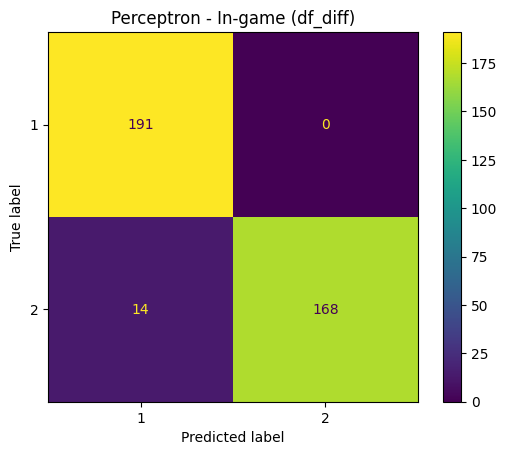

In [ ]:
# Perceptron para el dataset In-game Diff
perceptron_diff = Perceptron()
perceptron_diff.fit(X_train_diff, y_train_diff)
y_pred_diff = perceptron_diff.predict(X_test_diff)

print("Perceptron - In-game (df_diff):")
print(classification_report(y_test_diff, y_pred_diff))

cm_diff = confusion_matrix(y_test_diff, y_pred_diff)
disp_diff = ConfusionMatrixDisplay(confusion_matrix=cm_diff, display_labels=[1,2])
disp_diff.plot()
plt.title("Perceptron - In-game (df_diff)")
plt.show()

### All

Perceptron - All:
              precision    recall  f1-score   support

           1       0.99      0.99      0.99       191
           2       0.99      0.99      0.99       182

    accuracy                           0.99       373
   macro avg       0.99      0.99      0.99       373
weighted avg       0.99      0.99      0.99       373



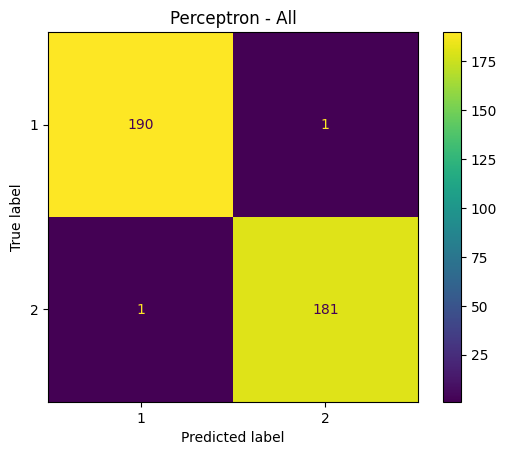

In [ ]:
# Perceptron para el dataset All
perceptron_all = Perceptron()
perceptron_all.fit(X_train_all, y_train_all)
y_pred_all = perceptron_all.predict(X_test_all)

print("Perceptron - All:")
print(classification_report(y_test_all, y_pred_all))

cm_all = confusion_matrix(y_test_all, y_pred_all)
disp_all = ConfusionMatrixDisplay(confusion_matrix=cm_all, display_labels=[1,2])
disp_all.plot()
plt.title("Perceptron - All")
plt.show()


Podemos notar que, tanto para *in-game* como para *all* el modelo ajusta sorprendente bien, incluso mejor que Navier Bayes, al punto de tener una *accuracy* para el modelo *in-game* de $0.96$ y para el modelo *all* de $0.99$.

Estos resultados nos muestra la importancia que tienen los objetivos a lo largo de la partida para aumentar tus probabilidades de ganar.

## Regresión Logística



La regresión logística es un método estadístico utilizado para modelar la relación entre una variable dependiente binaria (es decir, una variable que toma solo dos valores posibles, como $0$ y $1$, verdadero o falso, éxito o fracaso), en nuestro caso la variable binaria es $1$ o $2$ que indican qué equipo ganó el jeugo y una o más variables independientes (predictoras).

### Pre-game

Regresión Logística - Pre-game:
              precision    recall  f1-score   support

           1       0.51      1.00      0.68       191
           2       0.00      0.00      0.00       182

    accuracy                           0.51       373
   macro avg       0.26      0.50      0.34       373
weighted avg       0.26      0.51      0.35       373



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


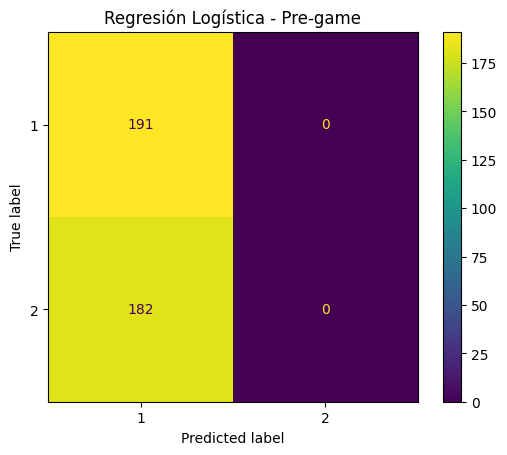

In [ ]:
from sklearn.linear_model import LogisticRegression

# Regresión Logística para el dataset Pre-game
logreg_pre = LogisticRegression(max_iter=3000)
logreg_pre.fit(X_train_pre, y_train_pre)
y_pred_pre = logreg_pre.predict(X_test_pre)

print("Regresión Logística - Pre-game:")
print(classification_report(y_test_pre, y_pred_pre))

cm_pre = confusion_matrix(y_test_pre, y_pred_pre)
disp_pre = ConfusionMatrixDisplay(confusion_matrix=cm_pre, display_labels=[1,2])
disp_pre.plot()
plt.title("Regresión Logística - Pre-game")
plt.show()


### In-game

Regresión Logística - In-game (df_diff):
              precision    recall  f1-score   support

           1       0.97      1.00      0.98       191
           2       1.00      0.97      0.98       182

    accuracy                           0.98       373
   macro avg       0.98      0.98      0.98       373
weighted avg       0.98      0.98      0.98       373



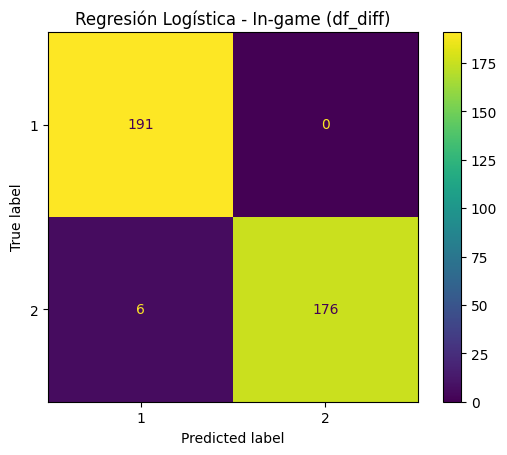

In [ ]:
# Regresión Logística para el dataset In-game (df_diff)
logreg_diff = LogisticRegression(max_iter=3000)
logreg_diff.fit(X_train_diff, y_train_diff)
y_pred_diff = logreg_diff.predict(X_test_diff)

print("Regresión Logística - In-game (df_diff):")
print(classification_report(y_test_diff, y_pred_diff))

cm_diff = confusion_matrix(y_test_diff, y_pred_diff)
disp_diff = ConfusionMatrixDisplay(confusion_matrix=cm_diff, display_labels=[1,2])
disp_diff.plot()
plt.title("Regresión Logística - In-game (df_diff)")
plt.show()

### All

Regresión Logística - All:
              precision    recall  f1-score   support

           1       0.96      1.00      0.98       191
           2       1.00      0.96      0.98       182

    accuracy                           0.98       373
   macro avg       0.98      0.98      0.98       373
weighted avg       0.98      0.98      0.98       373



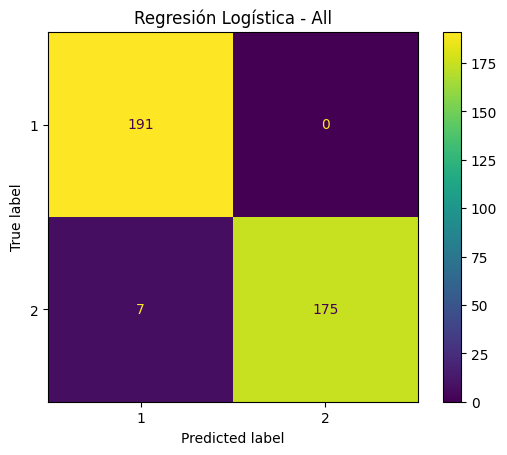

In [ ]:
# Regresión Logística para el dataset All
logreg_all = LogisticRegression(max_iter=5000)
logreg_all.fit(X_train_all, y_train_all)
y_pred_all = logreg_all.predict(X_test_all)

print("Regresión Logística - All:")
print(classification_report(y_test_all, y_pred_all))

cm_all = confusion_matrix(y_test_all, y_pred_all)
disp_all = ConfusionMatrixDisplay(confusion_matrix=cm_all, display_labels=[1,2])
disp_all.plot()
plt.title("Regresión Logística - All")
plt.show()


Para los datos *pre-game* continúa la tendencia de obtener una *accuracy* de $50\%$, específicamente de $0.51$.

Por otro lado, tanto para los datos *in-game* y *all* tenemos una *accuracy* de $0.98$. Ambos modelos clasifican casi perfectamente los datos.

## Vecinos cercanos

KNeighborsClassifier es un clasificador que se basa en el algoritmo de los k vecinos más cercanos, clasificando una instancia en función de las etiquetas de los vecinos más próximos. A pesar de su simplicidad, este modelo *no-parametrico* es util en gran cantidad de problemas tanto de clasificacion como de regresion, siendo util en situaciones donde la frontera de decision es muy irregular.

### Pre-game

K-Vecinos Cercanos - Pre-game:
              precision    recall  f1-score   support

           1       0.49      0.55      0.52       191
           2       0.46      0.41      0.43       182

    accuracy                           0.48       373
   macro avg       0.48      0.48      0.48       373
weighted avg       0.48      0.48      0.48       373



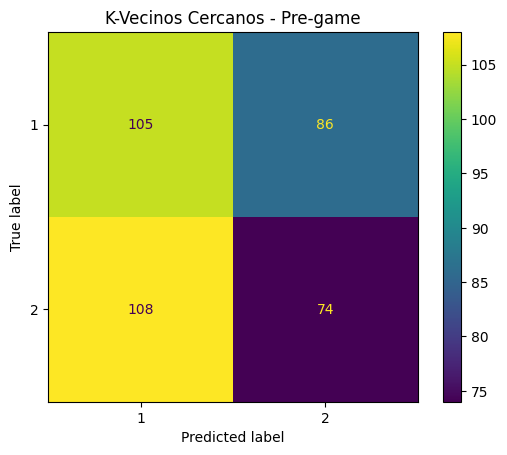

In [ ]:
# K-Vecinos Cercanos para el dataset Pre-game
knn_pre = KNeighborsClassifier()
knn_pre.fit(X_train_pre, y_train_pre)
y_pred_pre = knn_pre.predict(X_test_pre)

print("K-Vecinos Cercanos - Pre-game:")
print(classification_report(y_test_pre, y_pred_pre))

cm_pre = confusion_matrix(y_test_pre, y_pred_pre)
disp_pre = ConfusionMatrixDisplay(confusion_matrix=cm_pre, display_labels=[1,2])
disp_pre.plot()
plt.title("K-Vecinos Cercanos - Pre-game")
plt.show()

Vemos que a partir de una implementacion con valores *default*, el modelo ajusta por debajo de los niveles de rendimiento obtenidos por los modelos implementados anteriormente. Por esta razon es que se decidio intentar optimizarlo mediante el ajuste de hiperparametros, en este caso, el numero de vecinos cercanos.

In [ ]:
# Optimizacion n_neighbors

# Definir los parámetros a buscar
param_grid = {'n_neighbors': np.arange(5,40)} #

# Definir el GridSearchCV con 10-fold cross-validation
grid_search = GridSearchCV(knn_pre, param_grid, cv=10, scoring = "accuracy")

# Entrenar el modelo usando GridSearchCV
grid_search.fit(X_train_pre, y_train_pre)

# Mostrar los resultados
print("Mejor valor de k encontrado:", grid_search.best_params_['n_neighbors'])
print("Exactitud del mejor modelo en conjunto de prueba:", grid_search.best_score_)

Mejor valor de k encontrado: 34
Exactitud del mejor modelo en conjunto de prueba: 0.5275078299776286


Mejor valor de k encontrado: 34
Mean test score correspondiente: 0.5275078299776286


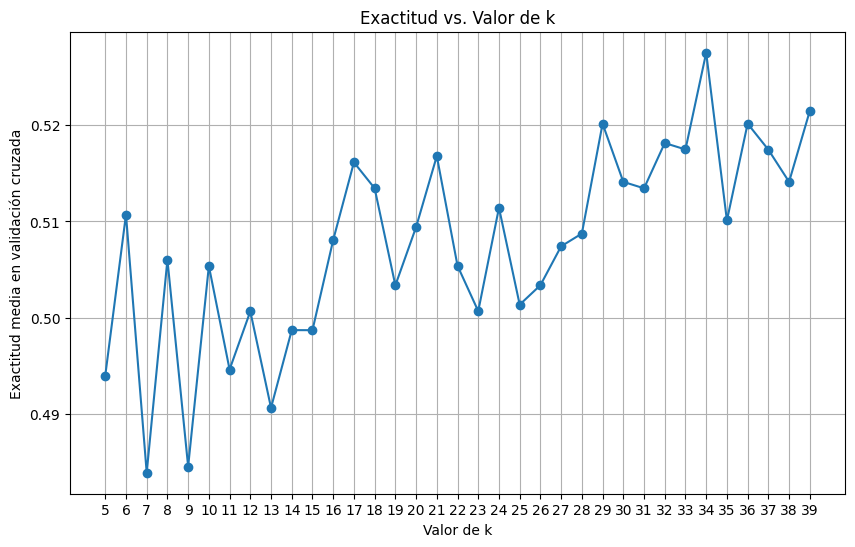

In [ ]:
# Grafico de metricas vs n_neighbors

# Obtener los resultados de GridSearchCV
results = grid_search.cv_results_
k_values = param_grid['n_neighbors']
mean_test_scores = results['mean_test_score']

# Encontrar el índice del mejor valor de k
best_k_idx = np.argmax(mean_test_scores)
best_k = k_values[best_k_idx]
best_score = mean_test_scores[best_k_idx]

# Reportar el mejor valor de k y el mean test score correspondiente
print("Mejor valor de k encontrado:", best_k)
print("Mean test score correspondiente:", best_score)

# Graficar accuracy en función de k
plt.figure(figsize=(10, 6))
plt.plot(k_values, mean_test_scores, marker='o')
plt.title("Exactitud vs. Valor de k")
plt.xlabel("Valor de k")
plt.ylabel("Exactitud media en validación cruzada")
plt.xticks(k_values)
plt.grid(True)
plt.show()

Conseguimos optimizar el modelo y el *accuracy* pasó de $0.48$ a $0.52$. Siguimos viendo el mismo comportamiendo para el *pre-game* que con otros clasificadores, lo cuál respalda la hipótisis del $50\%$ de probabilidades de ganar un juego.

### In-game

Del mismo modo que fue implementado para el *dataframe* **df_pre** correspondiente a datos previos al comienzo de partida, se procede a optimizar el numero de vecinos cercanos para el ajuste de **df_diff**

K-Vecinos Cercanos - In-game (df_diff):
              precision    recall  f1-score   support

           1       0.97      0.99      0.98       191
           2       0.99      0.97      0.98       182

    accuracy                           0.98       373
   macro avg       0.98      0.98      0.98       373
weighted avg       0.98      0.98      0.98       373



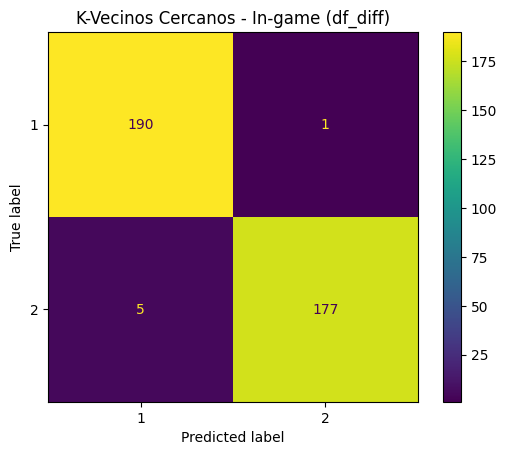

In [ ]:
# K-Vecinos Cercanos para el dataset In-game (df_diff)
knn_diff = KNeighborsClassifier()
knn_diff.fit(X_train_diff, y_train_diff)
y_pred_diff = knn_diff.predict(X_test_diff)

print("K-Vecinos Cercanos - In-game (df_diff):")
print(classification_report(y_test_diff, y_pred_diff))

cm_diff = confusion_matrix(y_test_diff, y_pred_diff)
disp_diff = ConfusionMatrixDisplay(confusion_matrix=cm_diff, display_labels=[1,2])
disp_diff.plot()
plt.title("K-Vecinos Cercanos - In-game (df_diff)")
plt.show()

In [ ]:
# Optimizacion n_neighbors

# Definir los parámetros a buscar
param_grid = {'n_neighbors': np.arange(3,30)} #

# Definir el GridSearchCV con 10-fold cross-validation -> Hace falta hacer CV?
grid_search = GridSearchCV(knn_diff, param_grid, cv=10, scoring="accuracy")

# Entrenar el modelo usando GridSearchCV
grid_search.fit(X_train_diff, y_train_diff)

# Mostrar los resultados
print("Mejor valor de k encontrado:", grid_search.best_params_['n_neighbors'])
print("Exactitud del mejor modelo en conjunto de prueba:", grid_search.best_score_)

Mejor valor de k encontrado: 24
Exactitud del mejor modelo en conjunto de prueba: 0.9953020134228188


Mejor valor de k encontrado: 24
Mean test score correspondiente: 0.9953020134228188


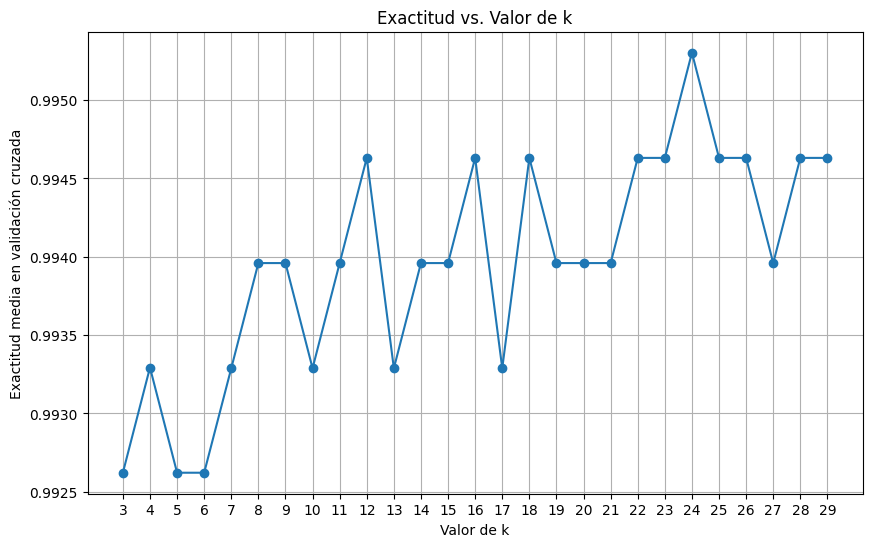

In [ ]:
# Grafico de metricas vs n_neighbors

# Obtener los resultados de GridSearchCV
results = grid_search.cv_results_
k_values = param_grid['n_neighbors']
mean_test_scores = results['mean_test_score']

# Encontrar el índice del mejor valor de k
best_k_idx = np.argmax(mean_test_scores)
best_k = k_values[best_k_idx]
best_score = mean_test_scores[best_k_idx]

# Reportar el mejor valor de k y el mean test score correspondiente
print("Mejor valor de k encontrado:", best_k)
print("Mean test score correspondiente:", best_score)

# Graficar accuracy en función de k
plt.figure(figsize=(10, 6))
plt.plot(k_values, mean_test_scores, marker='o')
plt.title("Exactitud vs. Valor de k")
plt.xlabel("Valor de k")
plt.ylabel("Exactitud media en validación cruzada")
plt.xticks(k_values)
plt.grid(True)
plt.show()

K-Vecinos Cercanos - In-game (n=34):
              precision    recall  f1-score   support

           1       0.97      1.00      0.99       191
           2       1.00      0.97      0.99       182

    accuracy                           0.99       373
   macro avg       0.99      0.99      0.99       373
weighted avg       0.99      0.99      0.99       373



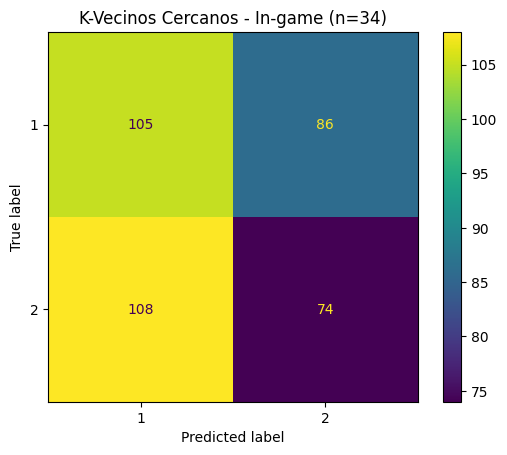

In [ ]:
# K-Vecinos Cercanos = 24
knn_diff_24 = KNeighborsClassifier(n_neighbors=24)
knn_diff_24.fit(X_train_diff, y_train_diff)
y_pred_diff_24 = knn_diff_24.predict(X_test_diff)

print("K-Vecinos Cercanos - In-game (n=34):")
print(classification_report(y_test_diff, y_pred_diff_24))

cm_diff_24 = confusion_matrix(y_test_diff, y_pred_diff_24)
disp_diff_24 = ConfusionMatrixDisplay(confusion_matrix=cm_diff_24, display_labels=[1,2])
disp_pre.plot()
plt.title("K-Vecinos Cercanos - In-game (n=34)")
plt.show()

Por medio de una de busqueda por grilla se llogro mejorar de $0.98$ a $0.99$ la *accuracy* del clasificador.

Podemos notar en los clasificadores anteriores que las métricas para los datos *in-game* y para *all* son muy similares, y muchas vieces incluso las del *in-game* son mejores. Así que de ahora en más nos concentraremos sólo en *in-game* y no utilizaremos *all*.

La desición la tomamos pensando en que hacer esto es similar a optimizar un dataframe probando qué atributo impacta más sobre el *accuracy*. En este caso, los atributos más determinanates de *all* están en *in-game*, así que nos quedamos sólo con este para los siguientes clasificadores.

## SVM (Support Vector Machine)

Este clasificador busca encontrar un hiperplano óptimo que separe lo mejor posible las clases en un espacio de mayor dimensionalidad a partir de la utilizacion de *vectores de soporte*. Una de las caracteristicas que presenta este modelo es su efectividad en espacios de alta dimensionalidad, a lo que se suma su eficiencia en terminos de memoria.  



### Pre-game

SVM - Pre-game:
              precision    recall  f1-score   support

           1       0.51      0.98      0.67       191
           2       0.50      0.02      0.04       182

    accuracy                           0.51       373
   macro avg       0.51      0.50      0.36       373
weighted avg       0.51      0.51      0.36       373



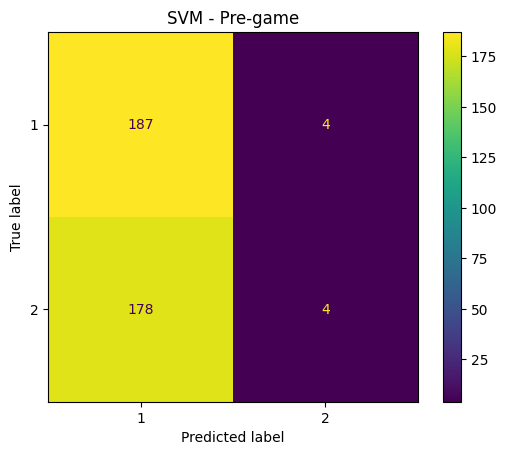

In [ ]:
# SVM para el dataset Pre-game
svm_pre = SVC()
svm_pre.fit(X_train_pre, y_train_pre)
y_pred_pre = svm_pre.predict(X_test_pre)

print("SVM - Pre-game:")
print(classification_report(y_test_pre, y_pred_pre))

cm_pre = confusion_matrix(y_test_pre, y_pred_pre)
disp_pre = ConfusionMatrixDisplay(confusion_matrix=cm_pre, display_labels=[1,2])
disp_pre.plot()
plt.title("SVM - Pre-game")
plt.show()

Al igual que los clasificadores anteriores, la *accuracy* dió en torno al $50\%$, en particular $0.51$.

Quisimos intentar optimizar el modelo, como lo verán para *in-game* y *all* más adelante, sin embargo por más que lo dejaramos compilando no corvergía a nada, así que decidimos sacar el código, ya que el resultado sin optimizar ya estaba dando un resultado consistente con los obtenidos anteriormente con otros clasificadores.



### In-game

SVM - In-game (df_diff):
              precision    recall  f1-score   support

           1       0.96      1.00      0.98       191
           2       1.00      0.96      0.98       182

    accuracy                           0.98       373
   macro avg       0.98      0.98      0.98       373
weighted avg       0.98      0.98      0.98       373



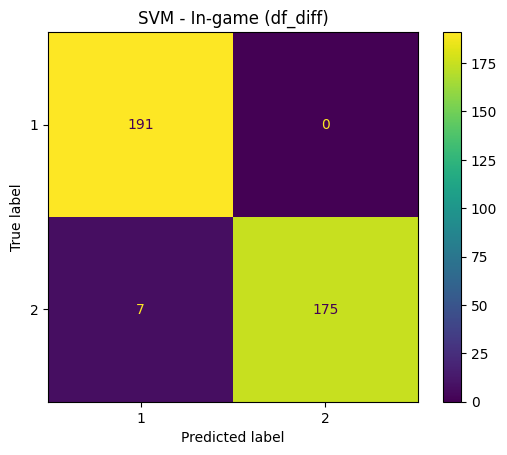

In [ ]:
# SVM para el dataset In-game (df_diff)
svm_diff = SVC()
svm_diff.fit(X_train_diff, y_train_diff)
y_pred_diff = svm_diff.predict(X_test_diff)

print("SVM - In-game (df_diff):")
print(classification_report(y_test_diff, y_pred_diff))

cm_diff = confusion_matrix(y_test_diff, y_pred_diff)
disp_diff = ConfusionMatrixDisplay(confusion_matrix=cm_diff, display_labels=[1,2])
disp_diff.plot()
plt.title("SVM - In-game (df_diff)")
plt.show()

#tiempo 11 seg aprox

In [ ]:
svm_diff.n_iter_ #2093
svm_diff.fit_status_ #0 -> ajusta

0

In [ ]:
# Optmizacion de SVM

C_range = np.logspace(-2, 10, 13)
gamma_range = np.logspace(-9, 3, 13)
param_grid = dict(gamma=gamma_range, C=C_range)
cv = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
grid = GridSearchCV(SVC(), param_grid=param_grid, cv=cv)
grid.fit(X_train_diff, y_train_diff)

print(
    "El mejor parámetro es %s con un score de %0.2f"
   % (grid.best_params_, grid.best_score_)
)

El mejor parámetro es {'C': 0.01, 'gamma': 0.1} con un score de 0.99


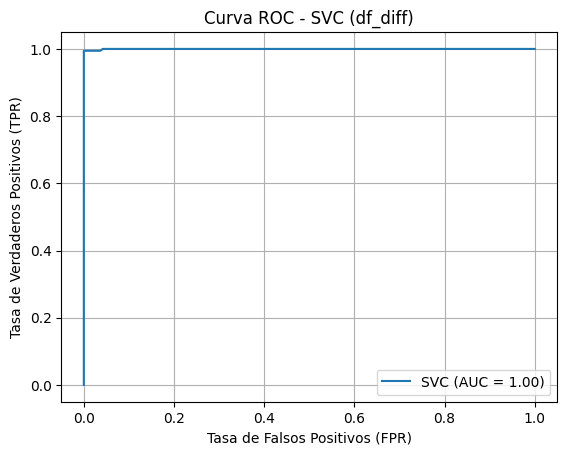

In [ ]:
svc = SVC(probability=True)
svc.fit(X_train_diff, y_train_diff)

#Obtener las probabilidades predichas del clasificador en el conjunto de prueba
y_proba = svc.predict_proba(X_test_diff)

#Graficar la curva ROC
roc_display = RocCurveDisplay.from_estimator(estimator=svc, X=X_test_diff, y=y_test_diff)
plt.title('Curva ROC - SVC (df_diff)')
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.grid(True)
plt.show()

De la matriz confución, las métricas y de la curva ROC podemos notar que el clasificador tiene un rendimiento prácticamente perfecto.

## Árboles de Decisión


DecisionTreeClassifier se basa en la construcción de árboles de decisión para realizar la clasificación; donde cada nodo del árbol representa una característica y cada rama representa una regla de decisión. Este clasificador proporcionar una interpretación clara de las características importantes en el proceso de clasificación de los datos.

Al igual que antes, se buscara ajustar un hiperparámetro para mejorar la clasificación. En este caso, el parámetro de interés es cpp_alpha, que busca equilibrar la complejidad del árbol con los errores de clasificación.
Para lograr esto, se generan gráficos que muestran los posibles valores de cpp_alpha junto con los valores de impurezas en las hojas (que indican un mayor error), así como la profundidad del árbol y la cantidad de hojas (indicativos de la complejidad). También se presenta un gráfico que muestra el rendimiento (viendo la accuracy) del árbol para diferentes valores de cpp_alpha.
Estos gráficos se analizan para determinar un valor de alpha que equilibre todos estos efectos. Una vez encontrado este valor, se entrena un árbol de decisión y se realiza la predicción sobre las muestras de prueba.

### Pre-game

Árbol de Decisión - Pre-game:
              precision    recall  f1-score   support

           1       0.52      0.84      0.64       191
           2       0.52      0.19      0.28       182

    accuracy                           0.52       373
   macro avg       0.52      0.51      0.46       373
weighted avg       0.52      0.52      0.46       373



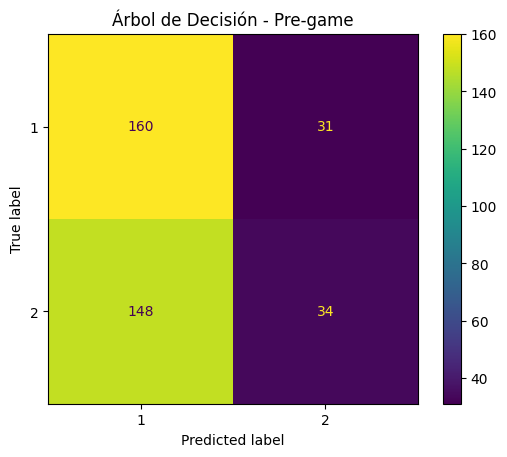

In [ ]:
# Árbol de Decisión para el dataset Pre-game
tree_pre = DecisionTreeClassifier()
tree_pre.fit(X_train_pre, y_train_pre)
y_pred_pre = tree_pre.predict(X_test_pre)

print("Árbol de Decisión - Pre-game:")
print(classification_report(y_test_pre, y_pred_pre))

cm_pre = confusion_matrix(y_test_pre, y_pred_pre)
disp_pre = ConfusionMatrixDisplay(confusion_matrix=cm_pre, display_labels=[1,2])
disp_pre.plot()
plt.title("Árbol de Decisión - Pre-game")
plt.show()

Text(0.5, 1.0, 'Árbol de Decisión ()')

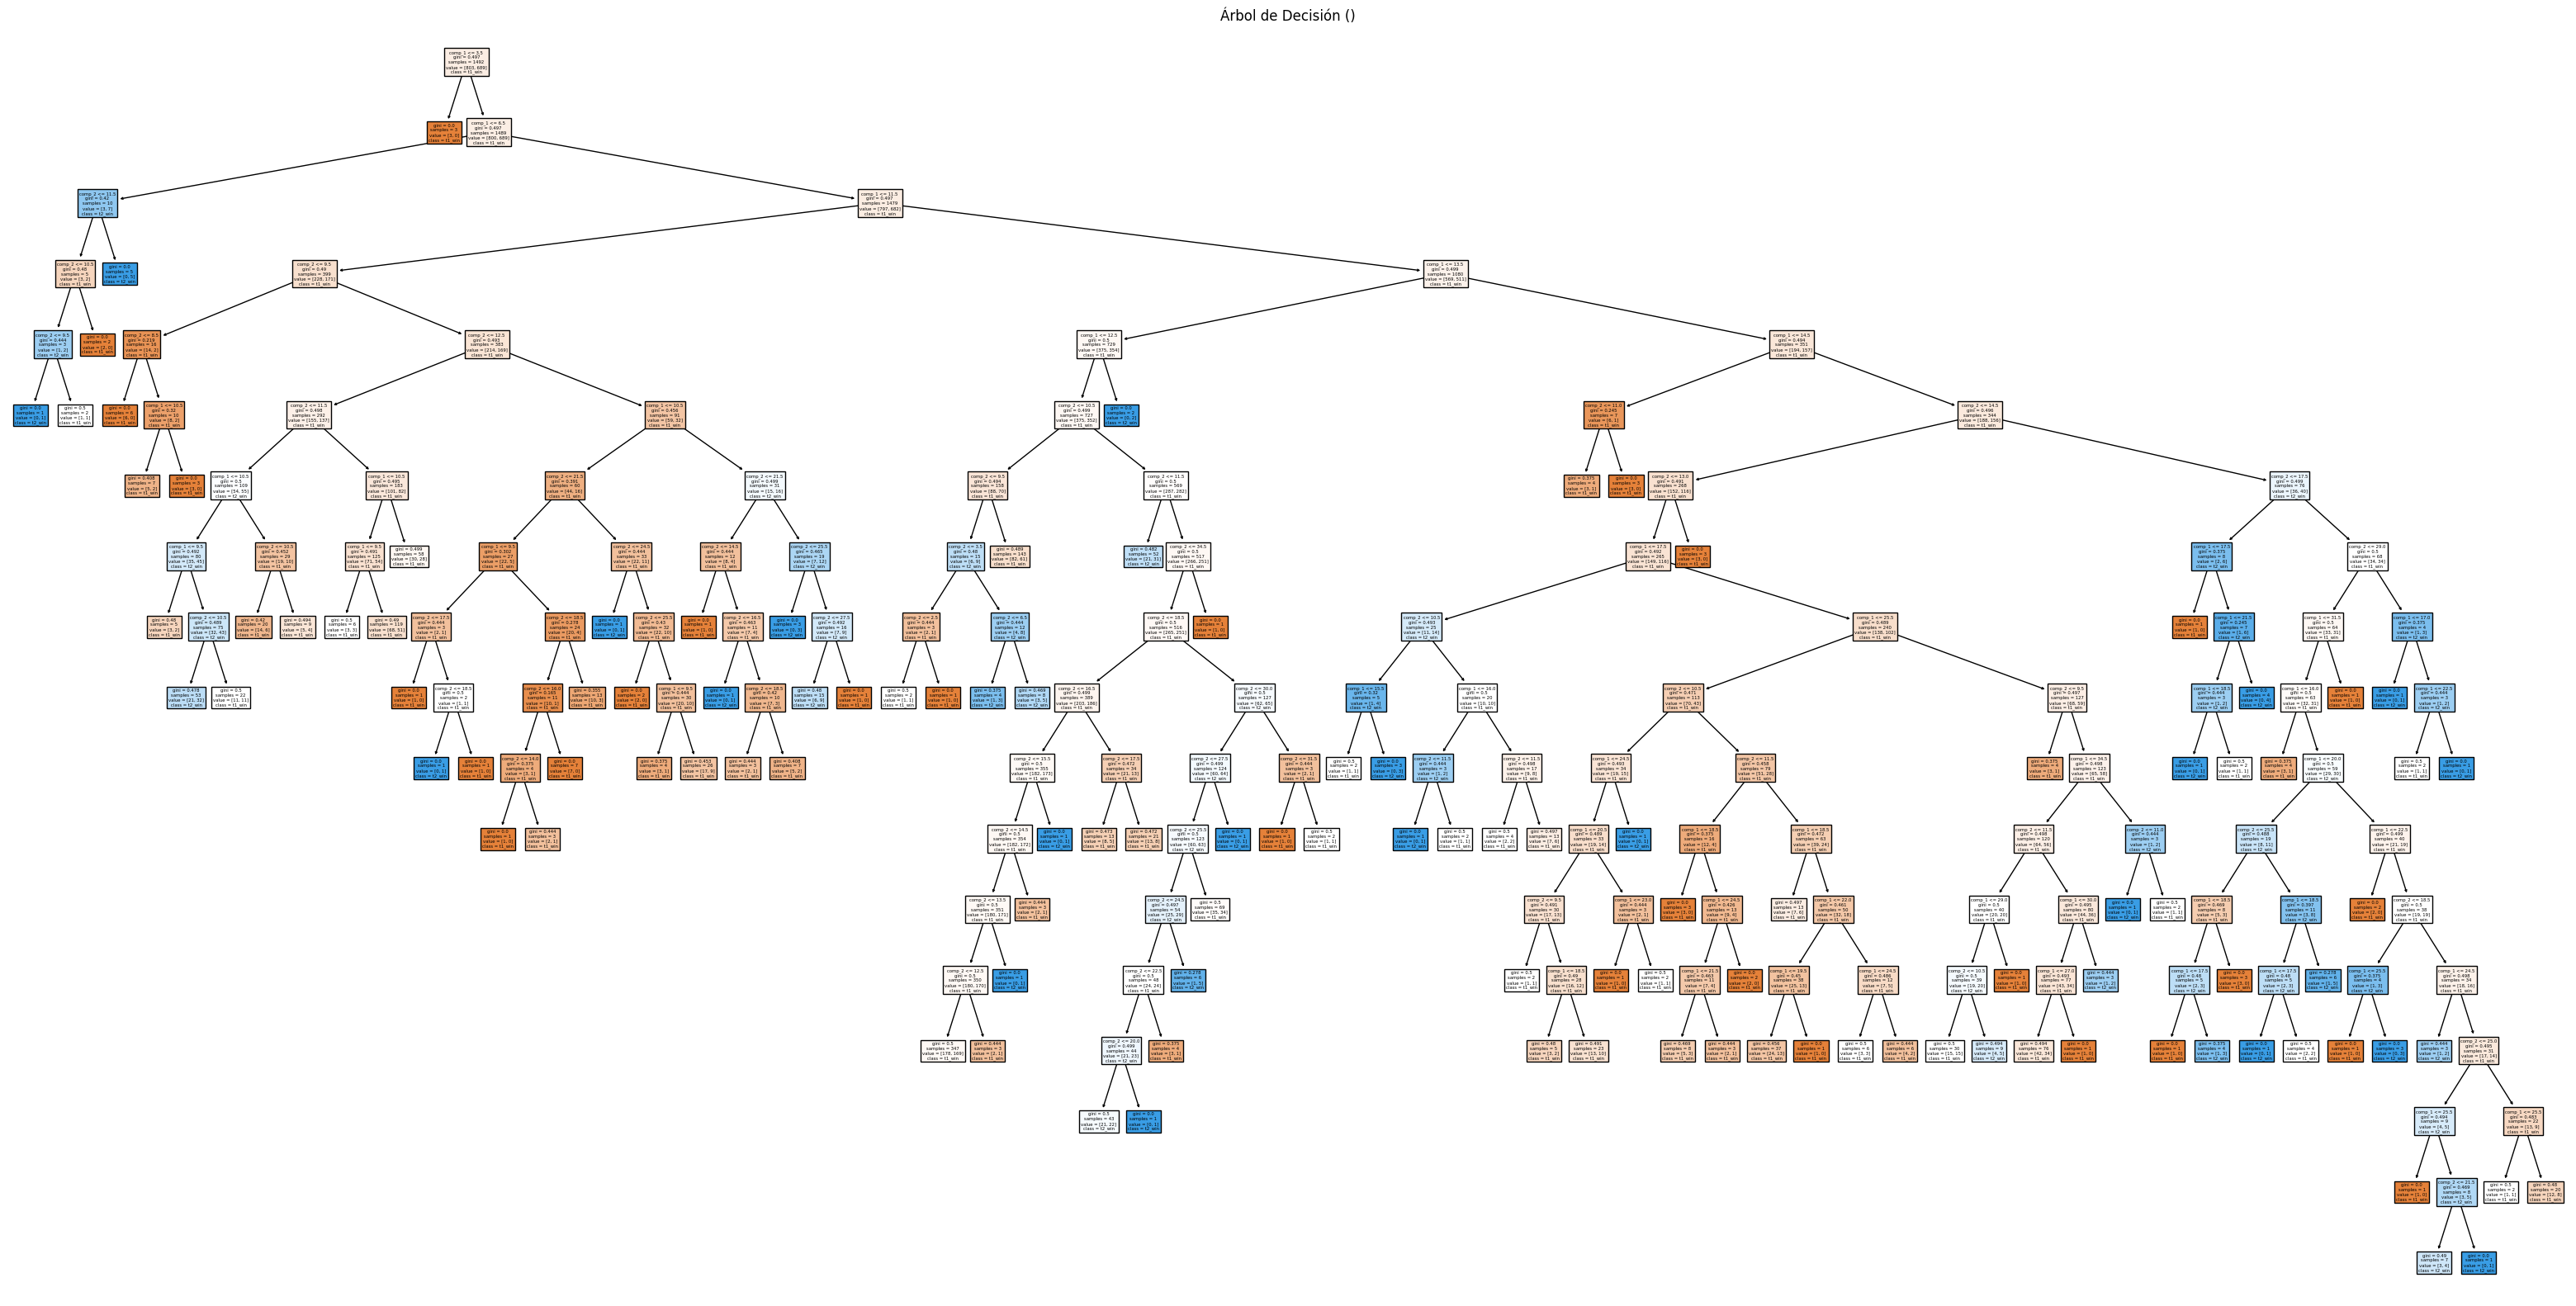

In [ ]:
#Graficar los árboles
plt.figure(figsize=(40, 20))

targets = ["t1_win", "t2_win"]
plot_tree(tree_pre, filled=True, feature_names=X_train_pre.columns, class_names=targets)
plt.title("Árbol de Decisión ()")

### In-game

Árbol de Decisión - In-game (df_diff):
              precision    recall  f1-score   support

           1       0.95      0.99      0.97       191
           2       0.99      0.95      0.97       182

    accuracy                           0.97       373
   macro avg       0.97      0.97      0.97       373
weighted avg       0.97      0.97      0.97       373



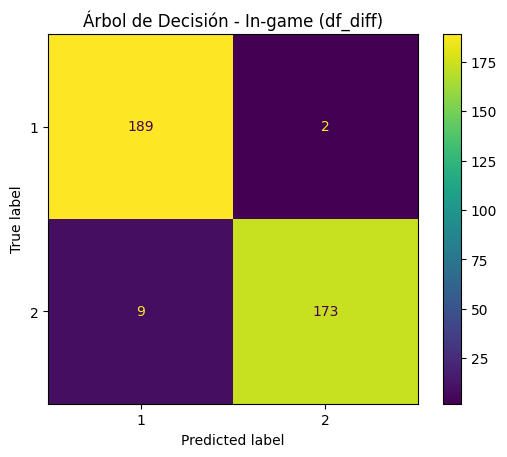

In [ ]:
# Árbol de Decisión para el dataset In-game
tree_diff = DecisionTreeClassifier()
tree_diff.fit(X_train_diff, y_train_diff)
y_pred_diff = tree_diff.predict(X_test_diff)

print("Árbol de Decisión - In-game (df_diff):")
print(classification_report(y_test_diff, y_pred_diff))

cm_diff = confusion_matrix(y_test_diff, y_pred_diff)
disp_diff = ConfusionMatrixDisplay(confusion_matrix=cm_diff, display_labels=[1,2])
disp_diff.plot()
plt.title("Árbol de Decisión - In-game (df_diff)")
plt.show()

Text(0.5, 1.0, 'Árbol de Decisión ()')

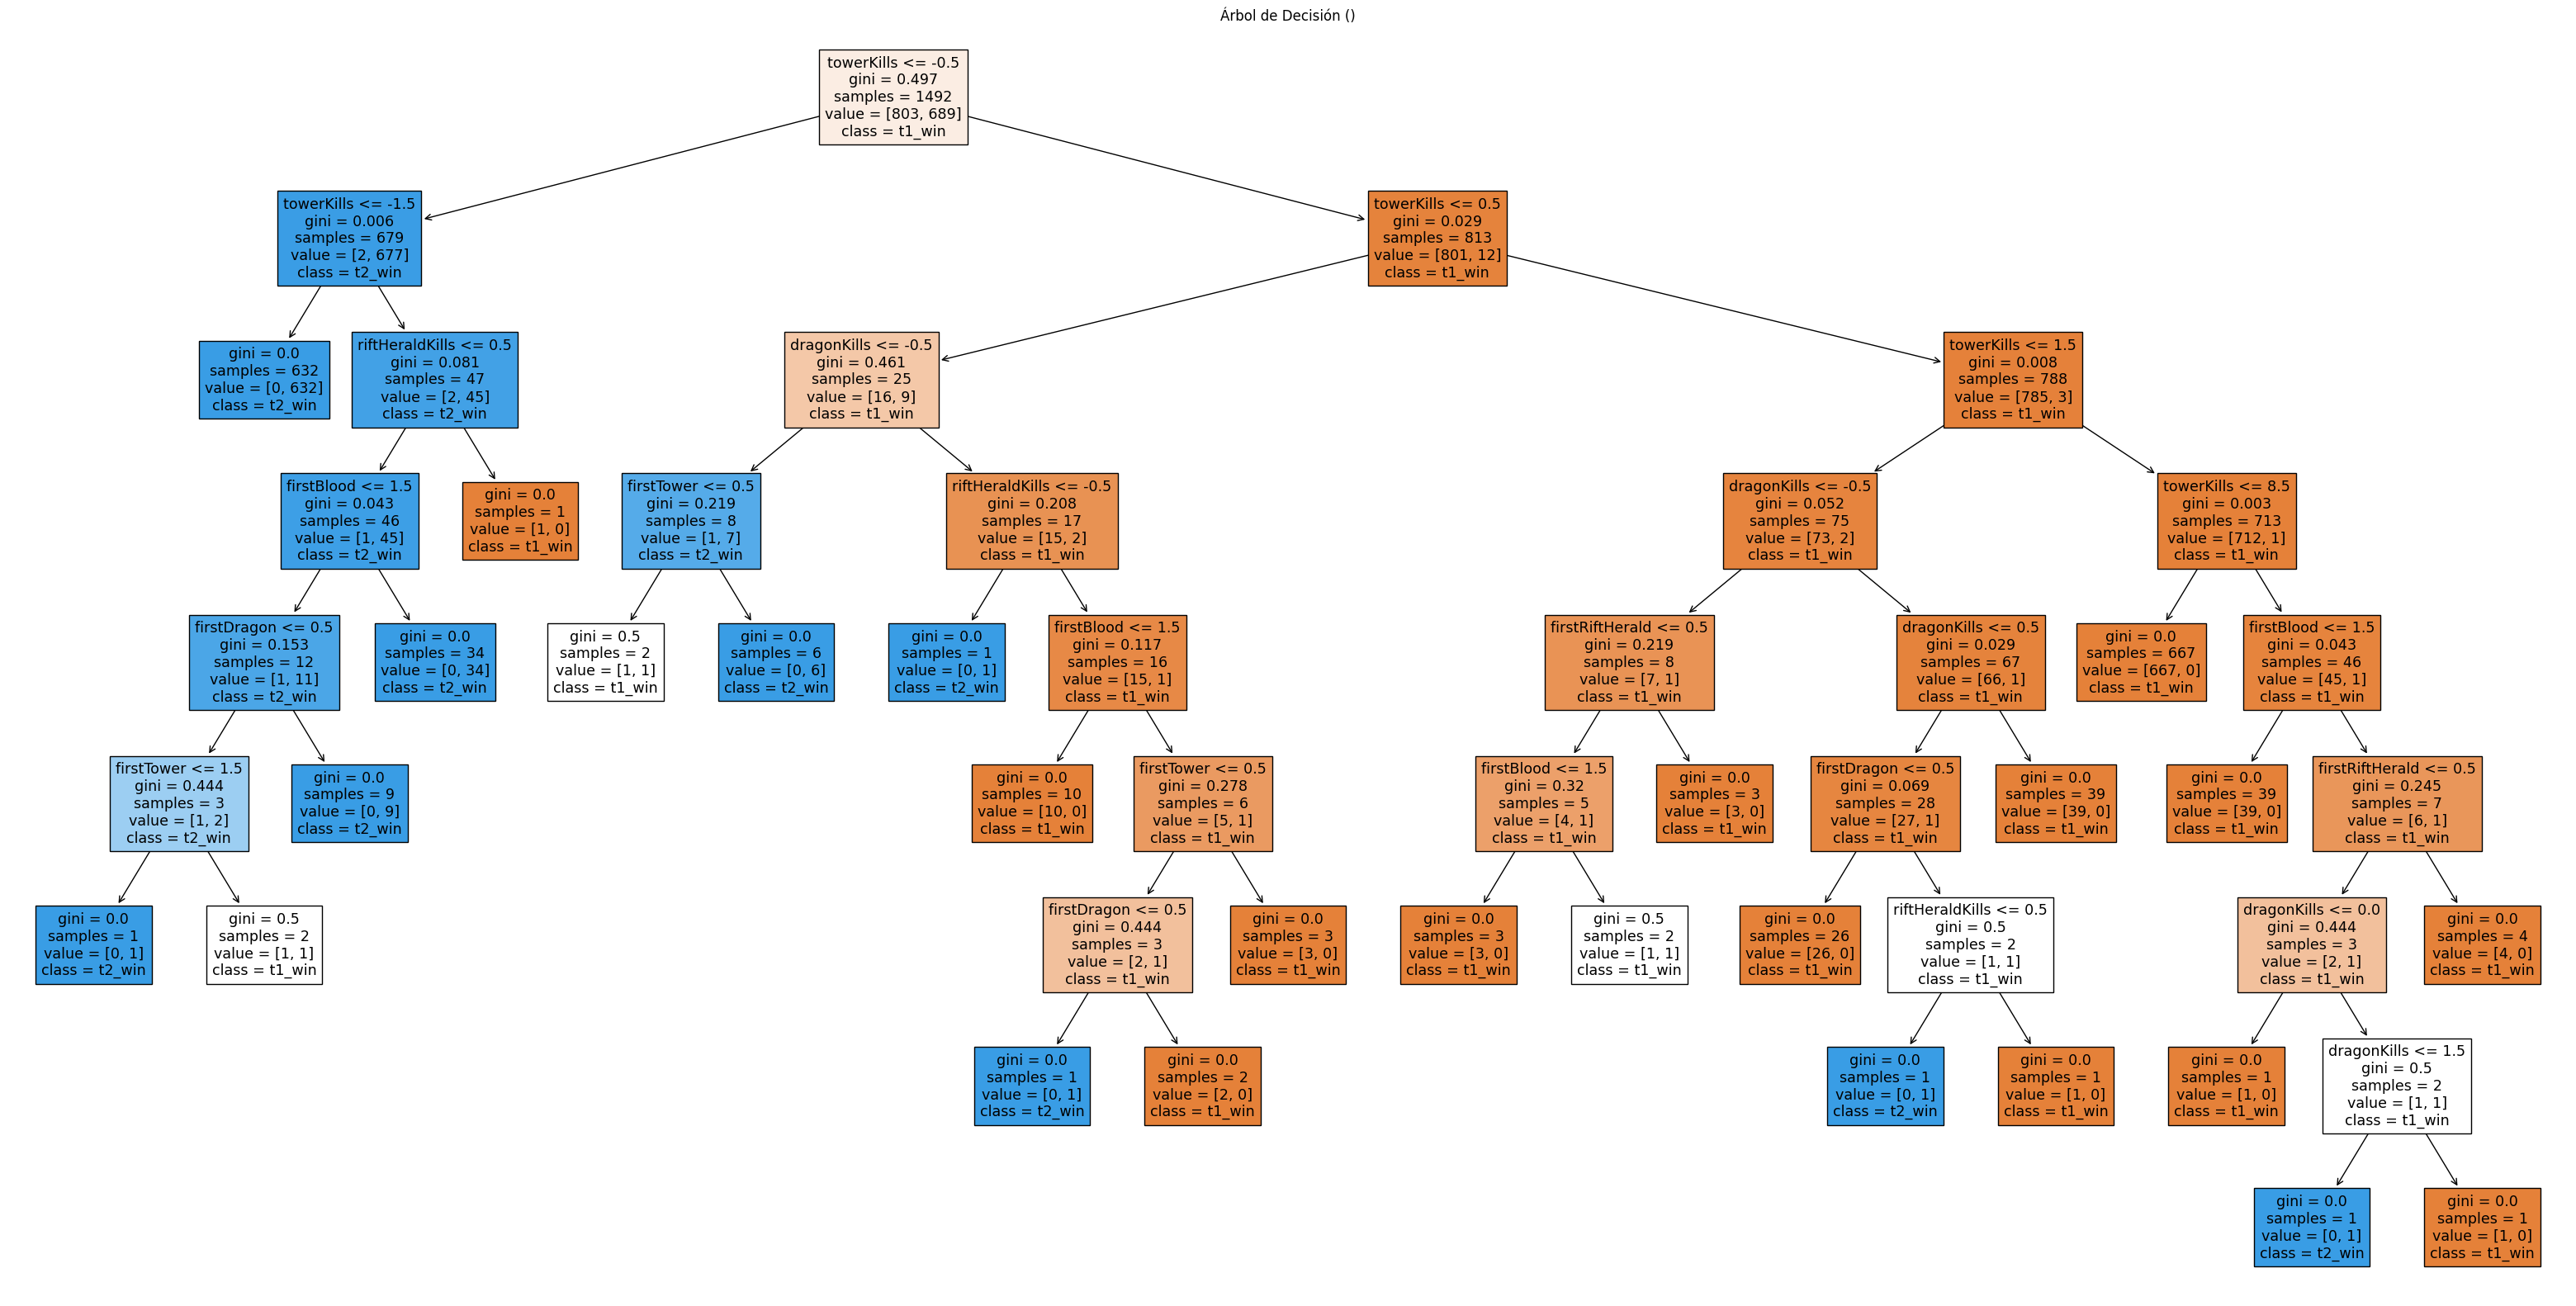

In [ ]:
#Graficar los árboles
plt.figure(figsize=(40, 20))

plot_tree(tree_diff, filled=True, feature_names=X_train_diff.columns, class_names=["t1_win", "t2_win"])
plt.title("Árbol de Decisión ()")

El esquema del árbol claramente muestra que los atributos relacionados con las *torres* son los más determinantes a lo hora de clasificar los datos, lo cual concuerda con el analisis hecho en la sección de Naive Bayes.

Number of nodes in the last tree is: 1 with ccp_alpha: 0.4785595158798919


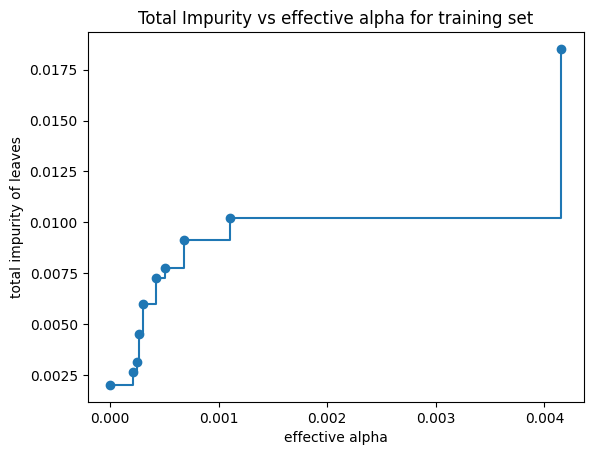

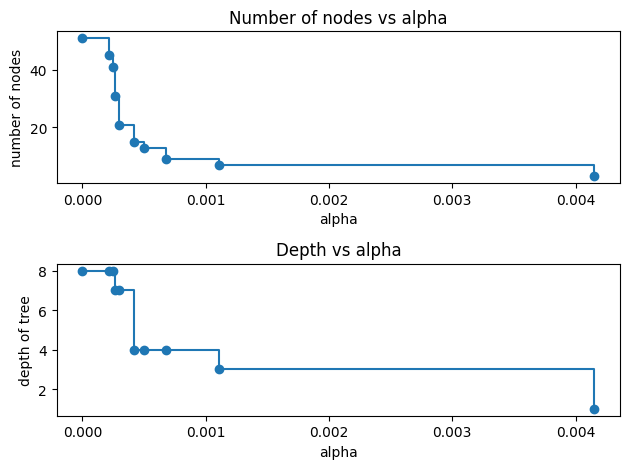

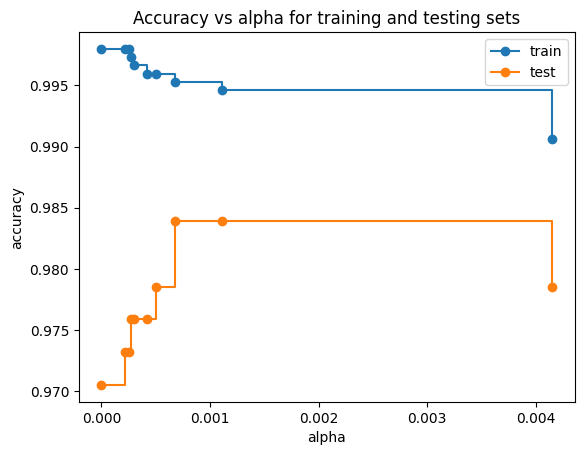

In [ ]:
# Optimizacion de Arbol (ccp_alpha)

path = tree_diff.cost_complexity_pruning_path(X_train_diff, y_train_diff)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train_diff, y_train_diff)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1)
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()


train_scores = [clf.score(X_train_diff, y_train_diff) for clf in clfs]
test_scores = [clf.score(X_test_diff, y_test_diff) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

Optimizando el `alpha` pudimos mejorar el *accuracy* que habíamos obtenido de $0.97$ a uno superior a $0.98$.

## k-means

K-means es un algoritmo de agrupamiento no supervisado. Su objetivo es dividir un conjunto de datos en $k$ grupos (o clústeres) distintos, donde cada grupo contiene datos similares entre sí y diferentes de los datos en otros grupos.

In [ ]:
def bench_k_means(kmeans, name, data, labels):
    """Benchmark to evaluate the KMeans initialization methods.

    Parameters
    ----------
    kmeans : KMeans instance
        A :class:`~sklearn.cluster.KMeans` instance with the initialization
        already set.
    name : str
        Name given to the strategy. It will be used to show the results in a
        table.
    data : ndarray of shape (n_samples, n_features)
        The data to cluster.
    labels : ndarray of shape (n_samples,)
        The labels used to compute the clustering metrics which requires some
        supervision.
    """
    t0 = time()
    estimator = make_pipeline(StandardScaler(), kmeans).fit(data)
    fit_time = time() - t0
    results = [name, fit_time, estimator[-1].inertia_]

    # Define the metrics which require only the true labels and estimator
    # labels
    clustering_metrics = [
        metrics.homogeneity_score,
        metrics.completeness_score,
        metrics.v_measure_score,
        metrics.adjusted_rand_score,
        metrics.adjusted_mutual_info_score,
    ]
    results += [m(labels, estimator[-1].labels_) for m in clustering_metrics]

    # The silhouette score requires the full dataset
    results += [
        metrics.silhouette_score(
            data,
            estimator[-1].labels_,
            metric="euclidean",
            sample_size=300,
        )
    ]

    # Show the results
    formatter_result = (
        "{:9s}\t{:.3f}s\t{:.0f}\t{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}"
    )
    print(formatter_result.format(*results))

In [ ]:
def k_means(data, labels):
  print(82 * "_")
  print("init\t\ttime\tinertia\thomo\tcompl\tv-meas\tARI\tAMI\tsilhouette")

  kmeans = KMeans(init="k-means++", n_clusters=10, n_init=4, random_state=0)
  bench_k_means(kmeans=kmeans, name="k-means++", data=data, labels=labels)

  kmeans = KMeans(init="random", n_clusters=10, n_init=4, random_state=0)
  bench_k_means(kmeans=kmeans, name="random", data=data, labels=labels)

  pca = PCA(n_components=10).fit(data)
  kmeans = KMeans(init=pca.components_, n_clusters=10, n_init=1)
  bench_k_means(kmeans=kmeans, name="PCA-based", data=data, labels=labels)

  print(82 * "_")

In [ ]:
#k_means(X_train_pre,y_train_pre)
print("\n")
k_means(X_train_diff,y_train_diff)




__________________________________________________________________________________
init		time	inertia	homo	compl	v-meas	ARI	AMI	silhouette
k-means++	0.077s	2609	0.798	0.253	0.385	0.228	0.383	0.173
random   	0.022s	3150	0.878	0.275	0.419	0.221	0.417	0.150
PCA-based	0.081s	3242	0.756	0.256	0.383	0.267	0.381	0.172
__________________________________________________________________________________


Notemos que el método de inicialización `k-means++` es el más óptimo a utilizar. Primero, de los 3, el `silhouette` mayor es el de `k-means` y el de `random`, siendo el de `k-means` ligeramente inferior, pero esto se compensa al tener la `inertia` más baja de los tres.

Así que usaremos como método de inicialización `k-means++`

In [ ]:
#Proyectar sobre el plano definido por las 2 primeras componentes de PCA para
#visualizar los datos y el resultado de clusterizar los datos proyectados con k-means.
def k_PCA(n_digits,data):
  reduced_data = PCA(n_components=2).fit_transform(data)
  kmeans = KMeans(init="k-means++", n_clusters=n_digits, n_init=4)
  kmeans.fit(reduced_data)

  # Step size of the mesh. Decrease to increase the quality of the VQ.
  h = 0.02  # point in the mesh [x_min, x_max]x[y_min, y_max].

  # Plot the decision boundary. For that, we will assign a color to each
  x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
  y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
  xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

  # Obtain labels for each point in mesh. Use last trained model.
  Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

  # Put the result into a color plot
  Z = Z.reshape(xx.shape)
  plt.figure(1)
  plt.clf()
  plt.imshow(
      Z,
      interpolation="nearest",
      extent=(xx.min(), xx.max(), yy.min(), yy.max()),
      cmap=plt.cm.Paired,
      aspect="auto",
      origin="lower",
  )

  plt.plot(reduced_data[:, 0], reduced_data[:, 1], "k.", markersize=2)
  # Plot the centroids as a white X
  centroids = kmeans.cluster_centers_
  plt.scatter(
      centroids[:, 0],
      centroids[:, 1],
      marker="x",
      s=169,
      linewidths=3,
      color="w",
      zorder=10,
  )
  plt.title(
      "K-means clustering on the digits dataset (PCA-reduced data)\n"
      "Centroids are marked with white cross"
  )
  plt.xlim(x_min, x_max)
  plt.ylim(y_min, y_max)
  plt.xticks(())
  plt.yticks(())
  plt.show()

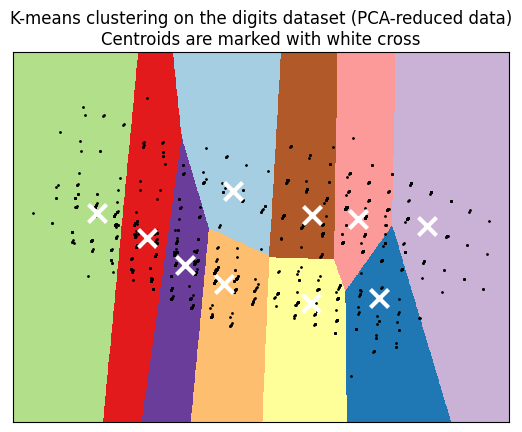

In [ ]:
k_PCA(10, X_train_diff)

Al reducir la dimensionalidad mediante PCA a 2 dimensiones, podemos visualizar los clusters de una manera más amigable.

Podemos observar que las fronteras de decisión están bien definidas, lo que nos indica que el modelo no tiene problemas para hacer la clasificación. Este conclusión respalda los resultados anteriormente otenidos por otros clasificadores, donde se observó un *accuracy* mayor al $90\%$.

## Random Forests


RandomForestClassifier utiliza un conjunto de árboles de decisión aleatorios para realizar la clasificación. Cada árbol es entrenado con una muestra aleatoria del conjunto de datos y las predicciones se combinan mediante votación.
Este clasificador usa un conjunto de árboles de decisión aleatorios para realizar la clasificación.



In [ ]:
#Grid Search
n_estimators = np.arange(100,500,50)
param_grid = dict(n_estimators=n_estimators)


cv = StratifiedShuffleSplit(n_splits=5, test_size=0.2, train_size=0.3, random_state=42)

grid = GridSearchCV(RandomForestClassifier(criterion="entropy"), param_grid=param_grid, cv=cv)
grid.fit(X_train_diff, y_train_diff)

print(
    "The best parameters are %s with a score of %0.2f"
    % (grid.best_params_, grid.best_score_)
)

The best parameters are {'n_estimators': 100} with a score of 0.99


              precision    recall  f1-score   support

      t1_win       0.97      0.99      0.98       191
      t2_win       0.99      0.97      0.98       182

    accuracy                           0.98       373
   macro avg       0.98      0.98      0.98       373
weighted avg       0.98      0.98      0.98       373



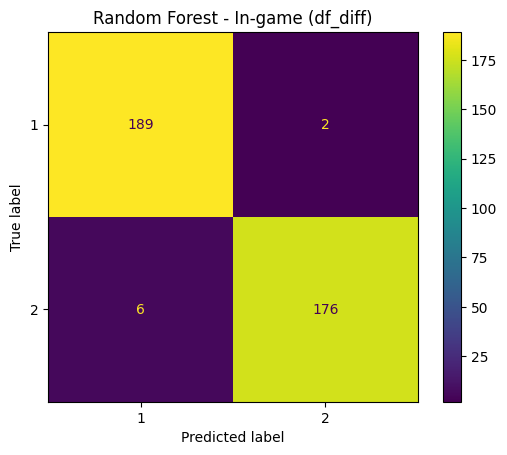

In [ ]:
forest = RandomForestClassifier(n_estimators=150,random_state=25,criterion="entropy")
forest.fit(X_train_diff, y_train_diff)
y_pred_forests = forest.predict(X_test_diff)


targets = ["t1_win","t2_win"]
print(classification_report(y_test_diff,y_pred_forests,target_names=targets))

disp = ConfusionMatrixDisplay.from_predictions(y_test_diff, y_pred_forests, display_labels=[1,2])

disp.ax_.set_title("Random Forest - In-game (df_diff)")

plt.show()

Posterior a realizar una busqueda por grilla para determinar el numero de arboles a utilizar, se entreno el modelo y se observo que al igual que los anteriores se obtiene un valor de *accuracy* de *0.98*

# Resultados y Conclusiones
---

## **Pre-game**

La *accuracy* de los modelos de clasificación para los datos de *pre-game* son:

$$
\begin{array}{|l|c|}
\hline
\textbf{Clasificador} & \textbf{Accuracy} \\ \hline
\text{Navier-Bayes}   & 0.51              \\ \hline
\text{Perceptron}     & 0.51              \\ \hline
\text{Regresión Logística} & 0.51         \\ \hline
\text{Vecinos cercanos} & 0.52         \\ \hline
\text{SVM}            & 0.48              \\ \hline
\text{Árboles de Decisión} & 0.52         \\ \hline
\end{array}
$$

El valor máximo de *accuracy* usando Árboles de decisión y el promedio de valores es de $0.51$.

En primera instancia podríamos pensar que los modelos no pueden clasificar correctamente, sin embargo esto más que un error en los datos o en el código, es un indiador de cómo está diseñado el juego. En general, para cada partida, cada equipo debería tener inicialmente un $50\%$ de oportunidades de ganar, independientemente de los *campeones* que escojas. Por ello podemos llegar a la conclusión que los clasificadores identifican qué equipo va a ganar con un $50\%$ de efectividad debido a que es algo intrínseco del juego.

Se podría hacer un análisis más en profundidad de las ocmposiciones de los equipoas, pero para ello seria necesario un estudio de todos los *campeones*, identificando qué tan fuertes son en cada *parche* (nombre coloquial a los cambios que hacen en el juego regularmente, que mejoran o desmejoran a los campeones); según la fuerza de cada campeón se le asignaría una especie de "peso" correspondiente. Por otro lado se deberían evaluar los *enfrentamientos* entre cada uno de los *campeones* para saber quién tiene la ventaja. A estos enfrentamiento también se les debería añadir un *peso*. Con estos datos, que habría que actualizar en cada parche, se podría obtener muchos mejores resultados para los modelos de clasificación aplicados a las composiciones de los equipos. Lamentablemente, no contamos con estos datos por lo que no pudimos hacer un análisis más a detalle.

## **In-game**

Por otro lado, la *accuracy* de los modelos de clasificación para los datos de *In-game* (usando **df_diff**) son:

$$
\begin{array}{|l|c|}
\hline
\textbf{Clasificador} & \textbf{Accuracy} \\ \hline
\text{Navier-Bayes}   & 0.96              \\ \hline
\text{Perceptron}     & 0.96              \\ \hline
\text{Regresión Logística} & 0.98         \\ \hline
\text{Vecinos Cercanos} & 0.99         \\ \hline
\text{SVM}            & 0.99              \\ \hline
\text{Árboles de Decisión} & 0.98         \\ \hline
\text{Random Forests} & 0.98         \\ \hline
\end{array}
$$

Estos valores, corresponden a la *accuracy* obtenida luego de optimizar los modelos en los casos correspondientes, obteniendo valores maximos de $0.99$ para Vecinos Cercanos y SVM, siendo la media sobre todos los clasificadores de $0.977$.

Notamos que dados los datos de partidas, impuestas las condiciones de duracion de partida entre $15$ y $20$ minutos, y numeros de inhibidores derribados por cualquier equipo en 1, los clasificadores son altamente eficacez. Esto es asi para todo los modelos implementados, mejorando incluso mas en el caso de aquellos clasifidacores que pudieron ser optimizados mediante una busqueda por grilla de sus hiperparametros.

En parte, esto se debe a que los datos de partidas sobre los que se trabajaron son altamente determinantes a la hora de incidir en las posibilidades de ganar la partida. Se destaca la importancia de cantidad de estructuras destruidas como factor clave, como se pudo observar en los analisis realizados al aplicar Naive Bayes y Arboles de decisión.

## **Conclusión General**

Uno de los objetivos del trabajo era determinar entre dos *composiciones* cuál tenía la mayor probabilidad de ganar usando como herramienta cada uno de los clasificadores. Pero admitimos que en este aspecto nuestros resultados no fueron exitosos, ya que si intentamos predecir qué equipo ganará solamente vamos a tener un $50\%$ de probabilidades de éxito, que es algo que ya sabíamos antes de usar los clasificadores. Por otro lado, con respecto a los datos *in-game* consideramos que los resultados fueron exitosos. Pudimos determinar casi con total exactitud qué equipo gana la partida. Quizás esto último no sea muy útil a la hora de predecir el resultado del juego antes de que este comience, pero aporta información muy útil de cara a la escena competitiva del juego, o inclusive la individual, ya que los resultados nos mostraron que los atributo de las *torres* eran los más influyentes a la hora de determinar un ganador. Por lo que, basado en estos resultados, si un equipo se centra en orientar su juego en priorizar las *torres* la probabilidad de ganar el juego aumentará.

